In [2]:
import numpy as np
import os
#import ipdb

def connect_dataset(file_list, icond_file_list, outputdir,
                    topodx=10, roi=2500, offset=5000,gclass_num=5,test_data_num=500):
    """
    複数のデータセットを連結する
    """
    #ipdb.set_trace()
    
    #Reading and combining files Decide start and end points of the learning area and convert them to grid numbers
    H = np.loadtxt(file_list[0], delimiter = ',')
    icond = np.loadtxt(icond_file_list[0], delimiter = ',')
    
    #Reading and combining files
    if len(file_list) > 1:
        for i in range(1, len(file_list)):
            H_temp = np.loadtxt(file_list[i], delimiter = ',')
            icond_temp = np.loadtxt(icond_file_list[i], delimiter = ',')
            H = np.concatenate((H,H_temp),axis=0)
            icond = np.concatenate((icond,icond_temp),axis = 0)
    
    roi_grids = int(roi / topodx)
    num_grids = int(H.shape[1] / gclass_num)
    H_subset = np.zeros([H.shape[0], roi_grids * gclass_num])
    for i in range(gclass_num):
        H_subset[:, i*roi_grids:(i+1)*roi_grids] = H[:, i*num_grids:(i*num_grids+roi_grids)]
    
    #Obtain the maximum and minimum values of data
    max_x = np.max(H_subset)
    min_x = np.min(H_subset)
    icond_max = np.max(icond, axis=0)
    icond_min = np.min(icond, axis=0)
    
    #Split the data into tests and training
    H_train = H_subset[0:-test_data_num,:]
    H_test = H_subset[H_subset.shape[0] - test_data_num:,:]
    icond_train = icond[0:-test_data_num,:]
    icond_test = icond[H.shape[0] - test_data_num:,:]
    
    #Save the data
    if not os.path.exists(outputdir):
        os.mkdir(outputdir)
    np.savetxt(outputdir + '/x_train.txt',H_train,delimiter = ',')
    np.savetxt(outputdir + '/x_test.txt',H_test,delimiter = ',')
    np.savetxt(outputdir + '/icond_train.txt',icond_train,delimiter = ',')
    np.savetxt(outputdir + '/icond_test.txt',icond_test,delimiter = ',')
    np.savetxt(outputdir + '/icond_min.txt',icond_min,delimiter = ',')
    np.savetxt(outputdir + '/icond_max.txt',icond_max,delimiter = ',')
    np.savetxt(outputdir + '/x_minmax.txt',[min_x, max_x],delimiter = ',')
    
    
if __name__=="__main__":
    original_data_dir = "/home/rimali2009/Journal_2"
    parent_dir = "/home/rimali2009/Journal_2"
    if not os.path.exists(parent_dir):
        os.mkdir(parent_dir)
    outputdir = parent_dir + "/data_g6_j2_roi770_jogan_5500_400grid"
    file_list = ['/home/rimali2009/Journal_2/eta_5500_g6_300grid_jogan_g6_rw820_400grid.csv']
    initial_conditions = ['/home/rimali2009/Journal_2/start_param_random_5500_jogan_g6_rw820_400grid.csv']
    connect_dataset(file_list, initial_conditions, outputdir, test_data_num=500, gclass_num=6, topodx=10., roi=770)
    

Using TensorFlow backend.


Train on 3600 samples, validate on 900 samples
Epoch 1/2000
3600/3600 [==============================] - 12s 3ms/step - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0682 - val_mean_squared_error: 0.0682
Epoch 2/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 3/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 4/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 5/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 6/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0360 - mean_squared_error: 0.0360 - v

Epoch 98/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 99/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 100/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 101/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 102/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 103/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0110 - val_mean_squared_er

3600/3600 [==============================] - 11s 3ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 195/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 196/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 197/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 198/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 199/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
E

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 291/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 292/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 293/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 294/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 295/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
E

3600/3600 [==============================] - 11s 3ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 387/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 388/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 389/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 390/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 391/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
E

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 483/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 484/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 485/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 486/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 487/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
E

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 579/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 580/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 581/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 582/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 583/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
E

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 675/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 676/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 677/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 678/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 679/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
E

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 771/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 772/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 773/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 774/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 775/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
E

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 867/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 868/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 869/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 870/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 871/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
E

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 963/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 964/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 965/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 966/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 967/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
E

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 1059/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 1060/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1061/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1062/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 1063/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0054 - val_mean_squared_error: 0.0

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1155/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 1156/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 1157/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1158/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 1159/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0050 - val_mean_squared_error: 0.0

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 1251/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 1252/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1253/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 1254/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1255/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0050 - val_mean_squared_error: 0.0

3600/3600 [==============================] - 11s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 1347/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1348/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 1349/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1350/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1351/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0047 - val_mean_squared_error: 0.0

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 1443/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 1444/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1445/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 1446/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1447/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0049 - val_mean_squared_error: 0.0

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1539/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1540/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 1541/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 1542/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 1543/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0051 - val_mean_squared_error: 0.0

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 1635/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1636/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 1637/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1638/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1639/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0043 - val_mean_squared_error: 0.0

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1731/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1732/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1733/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 1734/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 1735/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0050 - val_mean_squared_error: 0.0

3600/3600 [==============================] - 10s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1827/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 1828/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1829/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1830/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1831/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0057 - val_mean_squared_error: 0.0

3600/3600 [==============================] - 11s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1923/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 1924/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1925/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1926/2000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1927/2000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0047 - val_mean_squared_error: 0.0

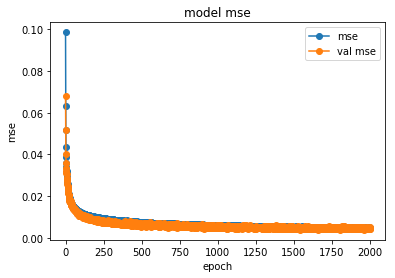

save the model
Train on 4000 samples, validate on 1000 samples
Epoch 1/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.0640 - val_mean_squared_error: 0.0640
Epoch 2/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 3/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 4/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 5/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 6/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0347 - mean_squared_e

Epoch 98/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 99/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 100/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 101/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 102/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 103/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0096 - val_mean_squared_er

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 195/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 196/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 197/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 198/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 199/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
E

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 291/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 292/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 293/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 294/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 295/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
E

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 387/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 388/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 389/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 390/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 391/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
E

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 483/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 484/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 485/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 486/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 487/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
E

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 579/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 580/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 581/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 582/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 583/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
E

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 675/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 676/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 677/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 678/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 679/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
E

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 771/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 772/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 773/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 774/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 775/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
E

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 867/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 868/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 869/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 870/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 871/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
E

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 963/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 964/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 965/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 966/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 967/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
E

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1059/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 1060/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 1061/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 1062/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1063/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0048 - val_mean_squared_error: 0.0

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1155/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1156/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1157/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1158/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 1159/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0048 - val_mean_squared_error: 0.0

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 1251/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1252/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1253/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1254/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 1255/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0043 - val_mean_squared_error: 0.0

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1347/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 1348/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 1349/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 1350/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1351/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0041 - val_mean_squared_error: 0.0

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1443/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1444/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1445/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1446/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 1447/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0043 - val_mean_squared_error: 0.0

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 1539/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1540/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 1541/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1542/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1543/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0040 - val_mean_squared_error: 0.0

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 1635/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1636/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1637/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1638/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1639/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0041 - val_mean_squared_error: 0.0

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 1731/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 1732/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 1733/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 1734/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1735/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0039 - val_mean_squared_error: 0.0

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 1827/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1828/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 1829/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1830/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 1831/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0039 - val_mean_squared_error: 0.0

4000/4000 [==============================] - 12s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 1923/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1924/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1925/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1926/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 1927/2000
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0038 - val_mean_squared_error: 0.0

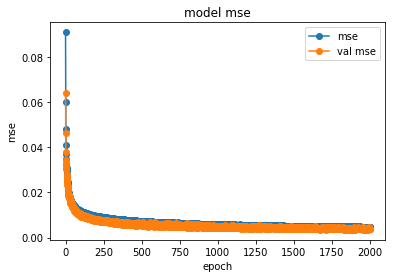

save the model


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  7 15:43:18 2017

@author: hanar
"""
import time
import numpy as np
import os
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.models import load_model
#from keras.utils.visualize_util import plot
import matplotlib.pyplot as plt
import keras.callbacks
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"

#Global variables for normalizing parameters
max_x = 1.0
min_x = 0.0
max_y = 1.0
min_y = 0.0


def deep_learning_tsunami(resdir, X_train_raw, y_train_raw, X_test_raw, y_test_raw,
                            _lr=0.02, _decay=0,
                            _validation_split=0.2, _batch_size=32,
                            _momentum=0.9, _nesterov=True,
                            num_layers=4, dropout=0.5,
                            node_num = 2500,
                            _epochs=2000):
    """
    Creating the inversion model of turbidity currents by deep learning
    """
    #Normalizing dataset
    X_train = get_normalized_data(X_train_raw, min_x, max_x)
    X_test = get_normalized_data(X_test_raw, min_x, max_x)
    y_train = get_normalized_data(y_train_raw, min_y, max_y)
    y_test = get_normalized_data(y_test_raw, min_y, max_y)
    
    #Generation of neural network model
    model = Sequential()
    model.add(Dense(node_num, input_dim=X_train.shape[1], activation='relu', kernel_initializer ='glorot_uniform'))#1st layer
    model.add(Dropout(dropout))
    for i in range(num_layers - 2):
        model.add(Dense(node_num, activation='relu', kernel_initializer ='glorot_uniform'))#2nd layer
        model.add(Dropout(dropout))
    model.add(Dense(y_train.shape[1], activation = 'relu', kernel_initializer ='glorot_uniform')) #last layer
    
    #Compiling the model
    model.compile(loss="mean_squared_error", 
              optimizer=SGD(lr=_lr, decay=_decay, momentum=_momentum, nesterov=_nesterov),
              #optimizer=Adadelta(),
              metrics=["mean_squared_error"])    
    
    #Perform learning
    t = time.time()
    check = ModelCheckpoint("model3.hdf5")
    #es_cb = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    #tb_cb = TensorBoard(log_dir=resdir, histogram_freq=2, write_graph=True, write_images=True)
    history = model.fit(X_train, y_train, epochs=_epochs, 
                    validation_split=_validation_split, batch_size=_batch_size,
                    callbacks=[check])
    
    #Evaluate learning result
    loss_and_metrics = model.evaluate(X_test,y_test)
    print("\nloss:{} mse:{}".format(loss_and_metrics[0],loss_and_metrics[1]))
    
    print("Elapsed time: {:.1f} sec.".format(time.time()-t))
    
    #Visualize learning result   
    #plot(model, to_file="model.png", show_shapes=True, show_layer_names=True)

    # model The state of change when letting you learnplot
    plot_history(history)
    
    return model, history

def apply_model(model, X, min_x, max_x, min_y, max_y):
    """
    Apply model
    Maximum and minimum values ​​of X and Y are required to normalize
    """
    X_norm =  (X - min_x) / (max_x - min_x)
    Y_norm = model.predict(X_norm)
    Y = Y_norm*(max_y - min_y)+min_y
    return Y

def plot_history(history):
    # Plot accuracy history
    plt.plot(history.history['mean_squared_error'],"o-",label="mse")
    plt.plot(history.history['val_mean_squared_error'],"o-",label="val mse")
    plt.title('model mse')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.legend(loc="upper right")
    plt.show()

#    # 損失の履歴をプロット
#    plt.plot(history.history['loss'],"o-",label="loss",)
#    plt.plot(history.history['val_loss'],"o-",label="val_loss")
#    plt.title('model loss')
#    plt.xlabel('epoch')
#    plt.ylabel('loss')
#    plt.legend(loc='upper right')
#    plt.show()

def test_model(model, x_test):
    #Test the results
    
    x_test_norm = get_normalized_data(x_test, min_x, max_x)
    test_result_norm = model.predict(x_test_norm)
    test_result = get_raw_data(test_result_norm, min_y, max_y)
    
    return test_result


def save_result(savedir, model, history, test_result):
    
    
    np.savetxt(savedir + 'test_result.txt',test_result,delimiter=',')
    np.savetxt(savedir+'loss.txt',history.history.get('loss'),delimiter=',')
    np.savetxt(savedir+'val_loss.txt',history.history.get('val_loss'),delimiter=',')
    
    #Serialize model and save
    print('save the model')
    model.save(savedir + 'model3.hdf5')

def load_data(datadir):
    """
    This function load training and test data sets, and returns variables
    """
    global min_x, max_x, min_y, max_y
    
    x_train = np.loadtxt(datadir + 'x_train.txt',delimiter=',')
    x_test = np.loadtxt(datadir + 'x_test.txt',delimiter=',')
    y_train = np.loadtxt(datadir + 'icond_train.txt',delimiter=',')
    y_test = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')
    min_y = np.loadtxt(datadir + 'icond_min.txt',delimiter=',')
    max_y = np.loadtxt(datadir + 'icond_max.txt',delimiter=',')
    [min_x, max_x] = np.loadtxt(datadir + 'x_minmax.txt',delimiter=',')
    
    return x_train, y_train, x_test, y_test

def set_minmax_data(_min_x, _max_x, _min_y, _max_y):
    global min_x, max_x, min_y, max_y
    
    min_x, max_x, min_y, max_y = _min_x, _max_x, _min_y, _max_y
    return
    


def get_normalized_data(x, min_val, max_val):
    """
    Normalizing the training and test dataset
    """
    x_norm = (x - min_val) / (max_val - min_val)
    
    return x_norm

def get_raw_data(x_norm, min_val, max_val):
    """
    
    Get raw data from the normalized dataset
    """
    x = x_norm * (max_val - min_val) + min_val
    
    return x

if __name__ == "__main__":
    
    #Reading data  
    datadir = '/home/rimali2009/Journal_2/data_g6_j2_roi770_jogan_5500_400grid/'
    resdir = '/home/rimali2009/Journal_2/result_g6_j2_roi770_jogan_5500_400grid/'
    if not os.path.exists(resdir):
        os.mkdir(resdir)
    
    x_train, y_train, x_test, y_test = load_data(datadir)
    
     
    #Execution of learning
    testcases = [4500,5000]
    for i in range(len(testcases)):
        resdir_case = resdir + '{}/'.format(testcases[i])        
        if not os.path.exists(resdir_case):
            os.mkdir(resdir_case)
        x_train_sub = x_train[0:testcases[i],:]
        y_train_sub = y_train[0:testcases[i],:]
        model, history = deep_learning_tsunami(resdir_case, x_train_sub, y_train_sub, x_test, y_test, num_layers=5)
        #Verify and save results
        result = test_model(model, x_test)
        save_result(resdir_case,model,history,result)

In [ ]:
from scipy.stats import variation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

hfont = {'fontname':'Century Gothic'}
textcol = 'k'

datadir = '/home/rimali2009/Journal_2/data_g6_j2_roi770_jogan_5500_400grid/'
resdir = '/home/rimali2009/Journal_2/result_g6_j2_roi770_jogan_5500_400grid/5000/'

test_result = np.loadtxt(resdir + 'test_result.txt',delimiter=',')
icond = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')
print(icond.shape)
resi = test_result - icond
titlelabel = ['Max Inundation Length','Flow Velocity', 'Max. Flow Depth', 'C_1', 'C_2', 'C_3', 'C_4','C_5','C_6']

for i in range(len(titlelabel)):
    plt.figure(num=None,dpi=250, facecolor='w', edgecolor='k')
    plt.hist(resi[:,i],bins=20)
    print('Standard Deviation:', np.std(resi[:,i]))
    print('Standard Deviation sample:', np.std(resi[:,i],ddof=1))
    print('Mean:', np.mean(resi[:,i]))
    print('CV:', np.std(resi[:,i],ddof=1)/np.mean(resi[:,i]))                           
    plt.title(titlelabel[i],color=textcol,size=14,**hfont)
    plt.xlabel('Deviation from true value',color=textcol,size=14,**hfont)
    plt.ylabel('Frequency',color=textcol,size=14,**hfont)
    plt.tick_params(labelsize=14,colors=textcol)
    plt.savefig(resdir+titlelabel[i] + 'hist' + '.eps')
    plt.savefig(resdir+titlelabel[i] + 'hist' + '.pdf')
    plt.show()

     distance       507       439       380       329       285       246
0    0.000000  0.024882  0.025905  0.018931  0.009775  0.002780  0.001823
1  109.646182  0.018199  0.018501  0.013078  0.006499  0.001484  0.001124
2  450.682215  0.006643  0.006792  0.004816  0.002317  0.000413  0.000318
3  543.078703  0.012463  0.013668  0.010783  0.005352  0.001210  0.000867
4  674.221738  0.010797  0.014157  0.013181  0.007667  0.003387  0.000792
5  766.825235  0.005089  0.007598  0.007365  0.004642  0.002498  0.000285
6  879.030860  0.000831  0.001224  0.001200  0.000772  0.000433  0.000045
7  965.302169  0.002988  0.004698  0.004945  0.003641  0.002568  0.000113
[[5.26881426e+03 5.40777627e+00 1.50080701e+00 1.27752696e-02
  1.47500284e-02 1.15773332e-02 9.26947369e-03 4.20379622e-03
  3.83169890e-03]]


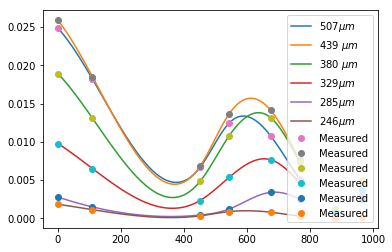

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from scipy import stats
from scipy.interpolate import interp1d 
import pandas as pd
from pykrige import OrdinaryKriging as OK
import ipdb


datadir = '/home/rimali2009/Journal_2/data_g6_j2_roi770_jogan_5500_400grid/'
resdir = '/home/rimali2009/Journal_2/result_g6_j2_roi770_jogan_5500_400grid/5000/'
#Initial setting
if not "model" in locals(): 
    model = load_model(resdir+'model3.hdf5')
#gclass = 3
#gclass_label = ["500 $\mu$m","125 $\mu$m","63 $\mu$m"]
gclass = 6
gclass_label =  ["507${\mu}m$","439 ${\mu}m$", "380 ${\mu}m$","329${\mu}m$", "285${\mu}m$","246${\mu}m$"]
gclass_name=['507','439','380','329','285','246'] 

topodx = 10.0
coord_num = int(model.layers[0].input_shape[1]/gclass)

#Acquires a value for normalizing input data to [0, 1]
min_x, max_x = np.loadtxt(datadir + 'x_minmax.txt',delimiter=',')
y_min = np.loadtxt(datadir + 'icond_min.txt',delimiter=',')
y_max = np.loadtxt(datadir + 'icond_max.txt',delimiter=',')

#Read outcrop data
#dist_max = 22200. #Distance of distal end of learning data
outcrop = pd.read_csv('../Journal_2/jogan_gs6_range.csv')
#outcrop = pd.read_csv('../DeepLearningTurbidite_Fukuda/GA_naruse_v2.csv')
#outcrop = outcrop.append(pd.DataFrame([[0,'Loc0',0,0,0],[dist_max,'LocE',0,0,0]], columns=outcrop.columns))
outcrop = outcrop.sort_values('distance')
outcrop['distance'] = outcrop['distance'] - 0
#d = pd.DataFrame(np.zeros((1, 7)),columns=['distance', 'g1','g2','g3','g4','g5','g6'])
#print(d)
#v=np.concatenate((outcrop, d))
#print(v)
#outcrop=pd.DataFrame(v,columns=['distance', 'g1','g2','g3','g4','g5','g6'])
#outcrop['distance'].iloc[-1]=4000
#outcrop = outcrop.append(pd.DataFrame([[0,'Loc0',0,0,0,0]], columns=outcrop.columns))
print(outcrop)

#Preparation under interpolation
thick_interp = np.zeros([1,coord_num*gclass])#補間されたサンプル厚さデータ
outcrop_x_id = np.round(outcrop['distance']/topodx).astype(np.int32) #逆解析システムでのサンプリング地点のindex番号
x = np.arange(0,coord_num*topodx,topodx)

#Complement data
for j in range(gclass):
    #f = interp1d(outcrop['distance'],outcrop.iloc[:,j+1], kind="quadratic",bounds_error=False,fill_value='extrapolate')
    #f = interp1d(outcrop['distance'],np.log10(outcrop.iloc[:,j+1]), kind="cubic",bounds_error=False,fill_value='extrapolate') 
    f = interp1d(outcrop['distance'],outcrop.iloc[:,j+1], kind="cubic",bounds_error=False,fill_value='extrapolate') 
    #Interpolation function of jth granularity level
    thick_interp[0,coord_num*j:coord_num*(j+1)] = f(x) #Supplemented data


#Normalize data
thick_interp[thick_interp < 0] = 0
thick_interp_norm =  (thick_interp - min_x) / (max_x - min_x)

#Perform inverse analysis
test_result_outcrop = model.predict(thick_interp_norm)
test_result_outcrop = test_result_outcrop * (y_max - y_min) + y_min
print(test_result_outcrop)
#add=np.array(3000)
#test_result_outcrop_add=np.concatenate((add,test_result_outcrop), axis=None)
#Output results
#print(test_result_outcrop_add)
np.savetxt('outcrop_result_g6_g300_j2_roi770_jogan_5500_400grid.txt',test_result_outcrop, delimiter=',')
for i in range(len(gclass_label)):
    plt.plot(x,thick_interp[0,coord_num * i:coord_num * (i+1)],label=gclass_label[i])
for i in range(gclass):
    plt.plot(outcrop['distance'], outcrop[gclass_name[i]],'o', label='Measured')
plt.legend()
plt.show()

<Figure size 1750x1000 with 2 Axes>

NameError: name 'read_setfile' is not defined

(5500, 9)
(5500, 2400)


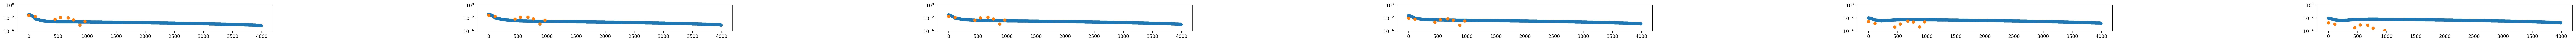

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Forward_model_for_DNN_jogan_g6_Rw820_400grid as fmodel
import time
import ipdb
%matplotlib inline


#dist_max = 3000.
gclass = 6
topodx=10.0
#gclass_name = ['840microm','594microm','420microm','297microm','210microm','148microm']#gclass_name = ['500micron', '125micron', '63micron']
gclass_name=['507','439','380','329','285','246'] 
gname_tex = ["507${\mu}m$","439 ${\mu}m$", "380 ${\mu}m$","329${\mu}m$", "285${\mu}m$","246${\mu}m$"]

estimated_icond=np.loadtxt('outcrop_result_g6_g300_j2_roi770_jogan_5500_400grid.txt', delimiter=',')
start = time.time()
fmodel.read_setfile("config_g6_400grid.ini")
(x,C,x_dep,deposit) = fmodel.forward(estimated_icond)
np.savetxt('eta_estimated_thickness_5K_g6_j2_roi770_400grid.csv', deposit, delimiter=',')
np.savetxt('eta_estimated_Distance_5K_g6_j2_roi770_400grid.csv', x_dep,delimiter=',')
estimated_dep_thickness_5000=np.transpose(np.loadtxt('/home/rimali2009/Journal_2/'+'eta_estimated_thickness_5K_g6_j2_roi770_400grid.csv', delimiter=','))
estimated_dep_thickness_5000=pd.DataFrame(estimated_dep_thickness_5000,columns=['507','439','380','329','285','246'])
estimated_dep_distance_5000=np.transpose(np.loadtxt('/home/rimali2009/Journal_2/'+'eta_estimated_Distance_5K_g6_j2_roi770_400grid.csv', delimiter=','))
estimated_dep_distance_5000=pd.DataFrame(estimated_dep_distance_5000,columns=['distance'])
estimated_dep_5000=pd.concat([estimated_dep_distance_5000,estimated_dep_thickness_5000],axis=1)
np.savetxt('estimated_dep_5K_g6_j2_roi770_400grid.csv',estimated_dep_5000,delimiter=',')
#data_estim=pd.DataFrame(estimated_dep_5000,columns=['distance','1.5phi','2.5phi','3.5phi','4.5phi'])
#print(estimated_dep_5000)

#Formatting the loaded data
#estimated_dep_df = pd.DataFrame(estimated_dep,columns=['distance','1.5phi','2.5phi','3.5phi','4.5phi'])
#estimated_dep = pd.DataFrame(np.array([x_bed - dist_offset,H1[-1,:],H2[-1,:],H3[-1,:]]).T,columns=['distance','500micron','125micron','63micron'])
#estimated_dep_5000= estimated_dep_5000.query('distance > 0')
#estimated_dep_5000 = estimated_dep_5000.query('distance < {}'.format(dist_max))
#print(estimated_dep_5000)
#Read original data
outcrop = pd.read_csv('../Journal_2/jogan_gs6_range.csv')
outcrop= pd.DataFrame(outcrop,columns=['distance','507','439','380','329','285','246'])
#Plot
plt.figure(num=None, figsize=(100, 1), dpi=250, facecolor='w', edgecolor='g')
hfont = {'fontname':'Sans'}
plt.subplots_adjust(bottom=0.10, wspace=0.8)

for i in range(gclass):
    plt.subplot(1,gclass,i+1)
    plt.plot(estimated_dep_5000['distance'],estimated_dep_5000[gclass_name[i]],'o', label='Estimated')
    plt.plot(outcrop['distance'], outcrop[gclass_name[i]],'o', label='Measured')
    plt.yscale('log')
    plt.ylim([0.0001,1.0])
    #plt.xlim(-100,4000)
    plt.savefig("thickness_distance_curve_joganfinal_g6_2.png")
    


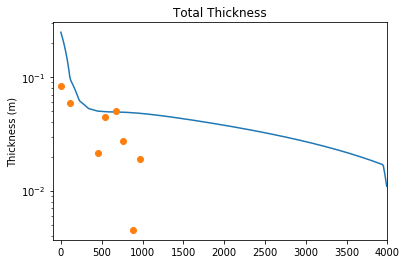

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Forward_model_for_DNN_jogan_5gs_Rw820_400grid as fmodel
import time
import ipdb
%matplotlib inline

estimated_thick=pd.read_csv('estimated_thick.csv',delimiter=',')
estimated_thick= pd.DataFrame(estimated_thick,columns=['distance','500','420','354','297','250','thickness'])
#print(estimated_thick)
measured_thick=pd.read_csv('measured_thick.csv',delimiter=',')
measured_thick=pd.DataFrame(measured_thick,columns=['distance','thickness'])


#Plot

plt.plot(estimated_thick['distance'],estimated_thick['thickness'],'-',label='Estimated')
plt.plot(measured_thick['distance'],measured_thick['thickness'],'o',label='Measured')
plt.title('Total Thickness')
plt.ylabel('Thickness (m)')
plt.yscale("log")
plt.xlim(-100,4000)
plt.savefig('../thickness.png')
plt.savefig('../thickness.eps')
plt.show()








        

In [90]:
def plot_result(params, labels, xmin, xmax):
    
    deposit_c = []
    totalthick = []
    symbollist = ['-','-.','--',':','-','-.']
    
    #与えられたパラメーターから結果を計算する
    for j in range(len(params)):
        deposit_c.append([])
        totalthick.append([])
        (x, C, x_dep, deposit_c[j]) = fmodel.forward(params[j]) #最適解を計算
        cnum = fmodel.cnum #粒度階の数を取得
        totalthick[j] = np.sum(deposit_c[j],axis=0)
    
    #xのオフセット補正（解析では最初のデータ点の値が座標0となるようにしているため）
    x_dep = x_dep + spoints[0]
    
    
    #プロットの書式を整える
    plt.figure(num=None, figsize=(7, 8.5), dpi=150, facecolor='w', edgecolor='k')
    fp = FontProperties(size=9)
    plt.rcParams["font.size"] = 9
        
    plt.subplot(cnum+1,1,1)
    plt.plot(spoints, np.sum(deposit_o,axis=0),marker='o', markersize=4, fillstyle='none', linestyle = 'None', label = "Observation")
    for l in range(len(params)):
        plt.plot(x_dep[xmin:xmax], totalthick[l][xmin:xmax], symbollist[l], linewidth = 0.75, label = labels[l])
    plt.title('Total Thickness')
    plt.ylabel('Thickness (m)')
    plt.yscale("log")
    plt.ylim(0,0.4)
    plt.legend(prop = fp, loc='best', borderaxespad=1)




In [9]:
gclass = 6
#print(estimated_dep_5000['distance'])
for i in range(gclass):
    x = estimated_dep_5000['distance']
    y = estimated_dep_5000[gclass_name[i]]
    a=np.interp(965.302169,x,y)
    print(a)

0.002559440480031986
0.003148614269749093
0.003859663386518348
0.004673341929448533
0.005597796436650212
0.006637033891032267


Using TensorFlow backend.


     distance       507       439       380       329       285       246
0    0.000000  0.024882  0.025905  0.018931  0.009775  0.002780  0.001823
1  109.646182  0.018199  0.018501  0.013078  0.006499  0.001484  0.001124
2  450.682215  0.006643  0.006792  0.004816  0.002317  0.000413  0.000318
3  543.078703  0.012463  0.013668  0.010783  0.005352  0.001210  0.000867
4  674.221738  0.010797  0.014157  0.013181  0.007667  0.003387  0.000792
5  766.825235  0.005089  0.007598  0.007365  0.004642  0.002498  0.000285
6  879.030860  0.000831  0.001224  0.001200  0.000772  0.000433  0.000045
7  965.302169  0.002988  0.004698  0.004945  0.003641  0.002568  0.000113
     distance       507       439       380       329       285       246
0  109.646182  0.018199  0.018501  0.013078  0.006499  0.001484  0.001124
1  450.682215  0.006643  0.006792  0.004816  0.002317  0.000413  0.000318
2  543.078703  0.012463  0.013668  0.010783  0.005352  0.001210  0.000867
3  674.221738  0.010797  0.014157  0.0

/home/rimali2009/anaconda3/envs/test3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


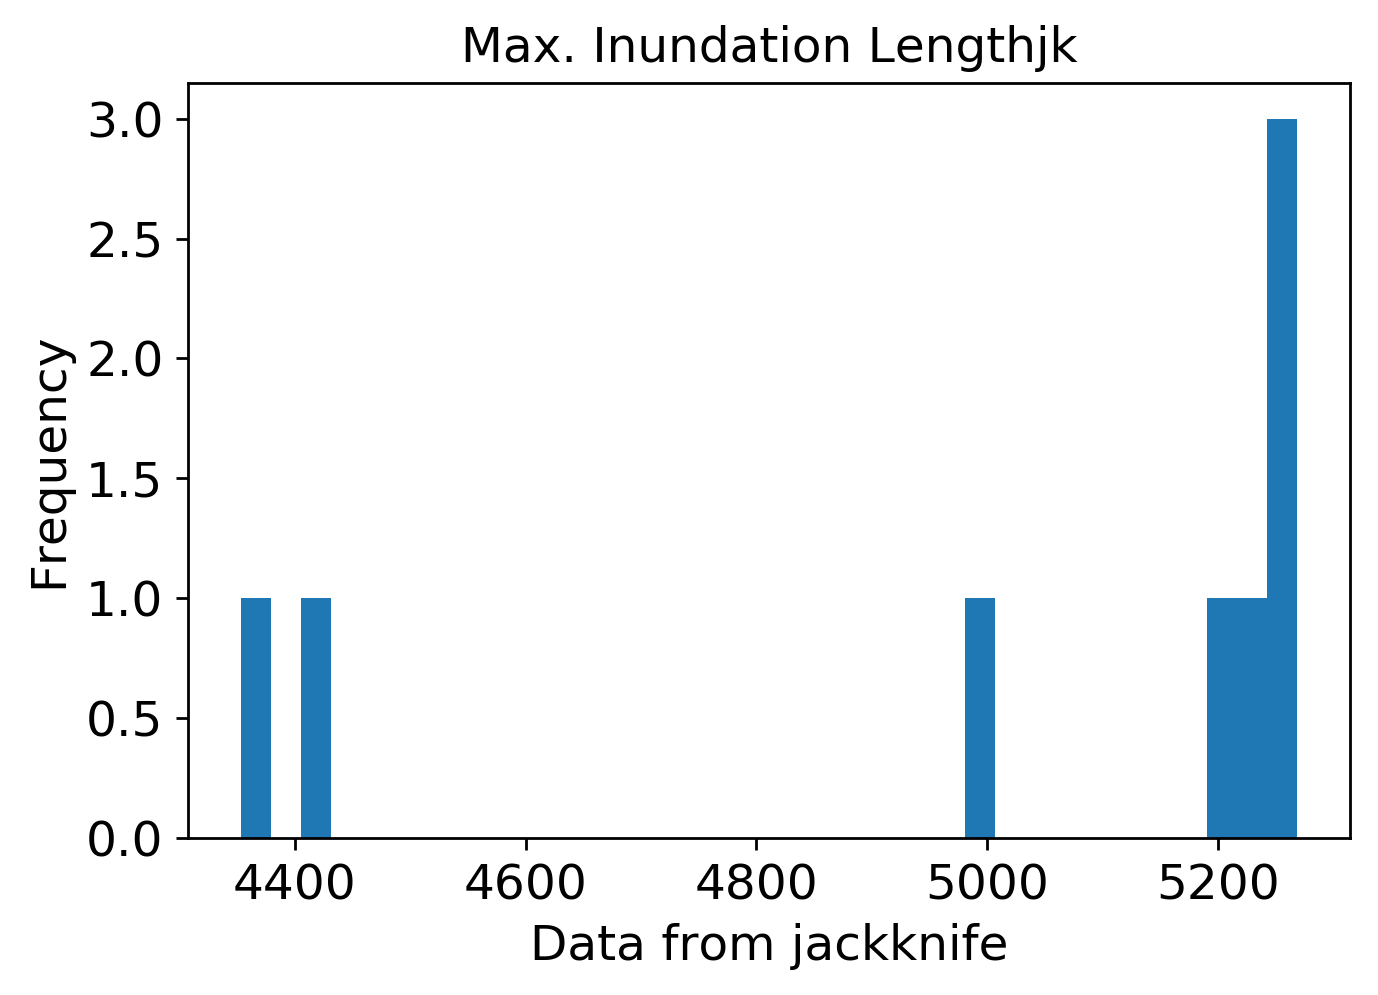

mean: 5.04570766901798
jk_e: 0.866475262105542
CI 1.6982915137268624


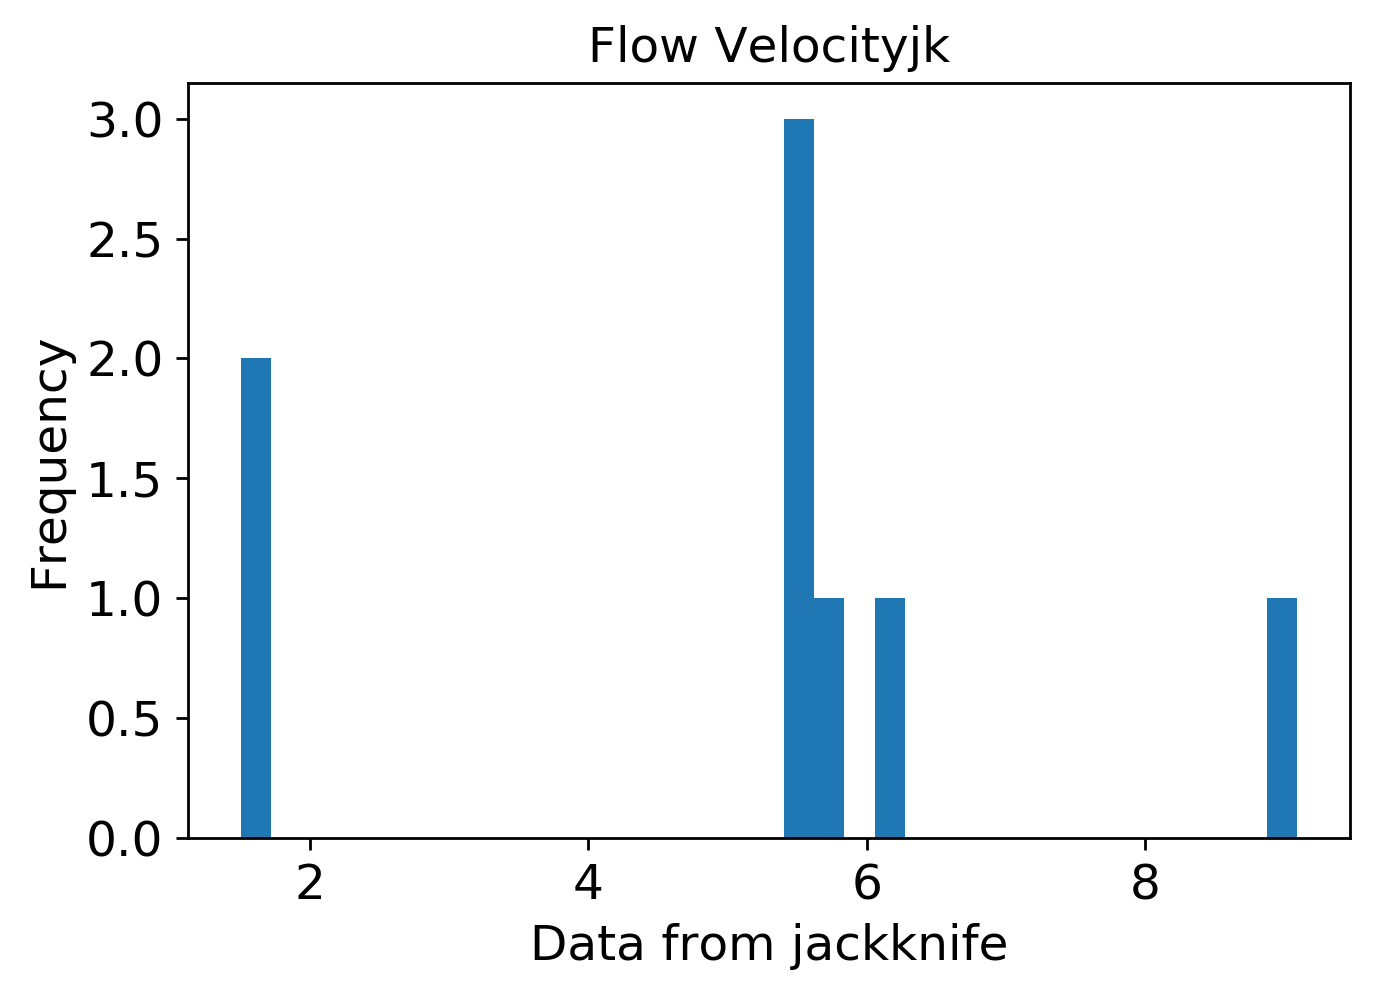

mean: 2.2997993445030143
jk_e: 0.5327380974420087
CI 1.044166670986337


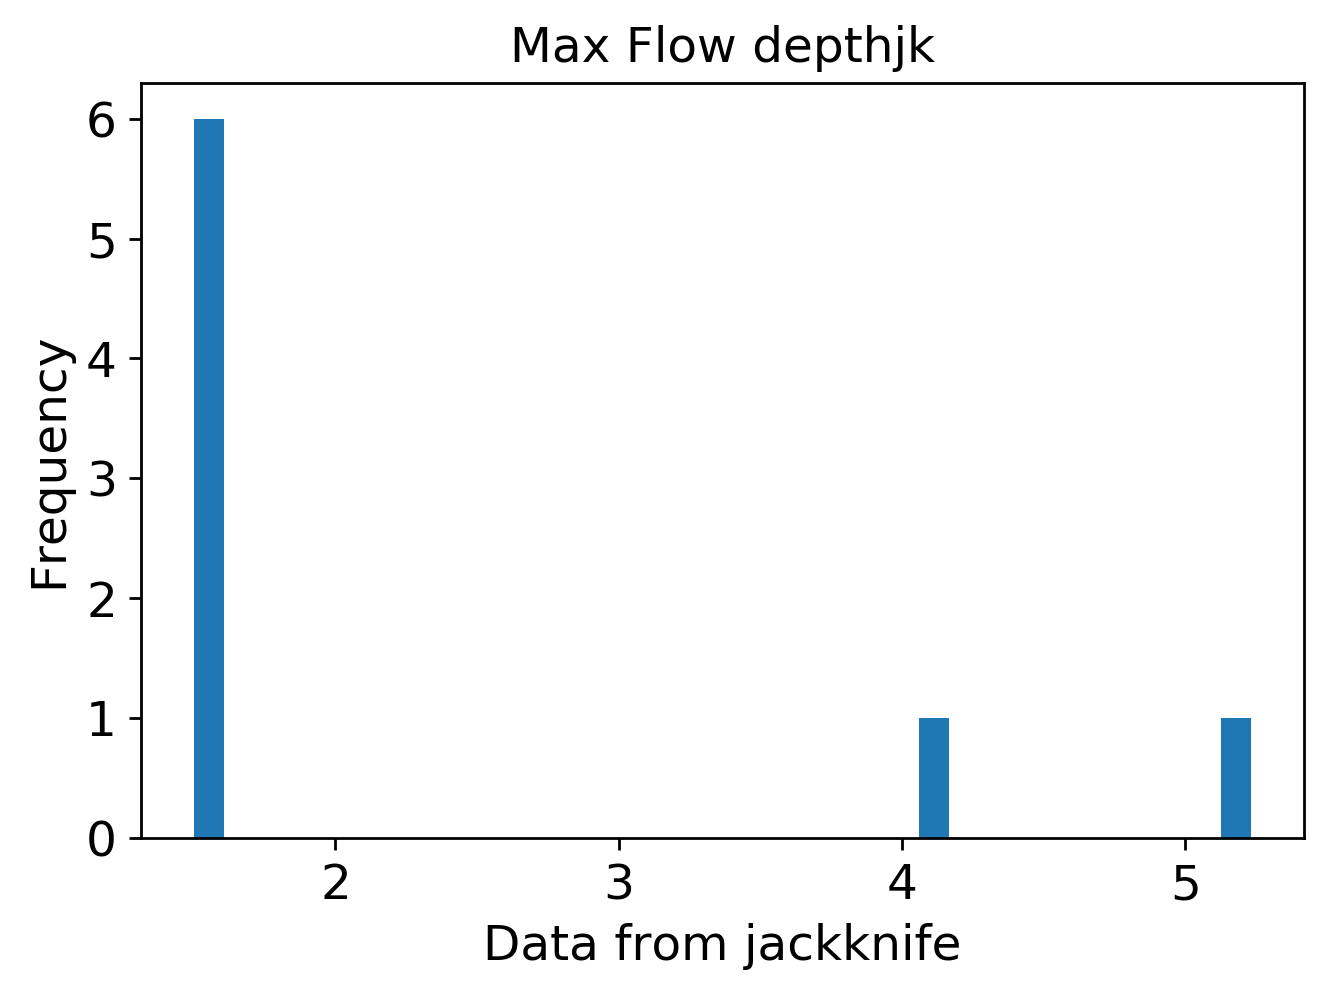

mean: 0.012084129481896553
jk_e: 0.0010829601645573215
CI 0.00212260192253235


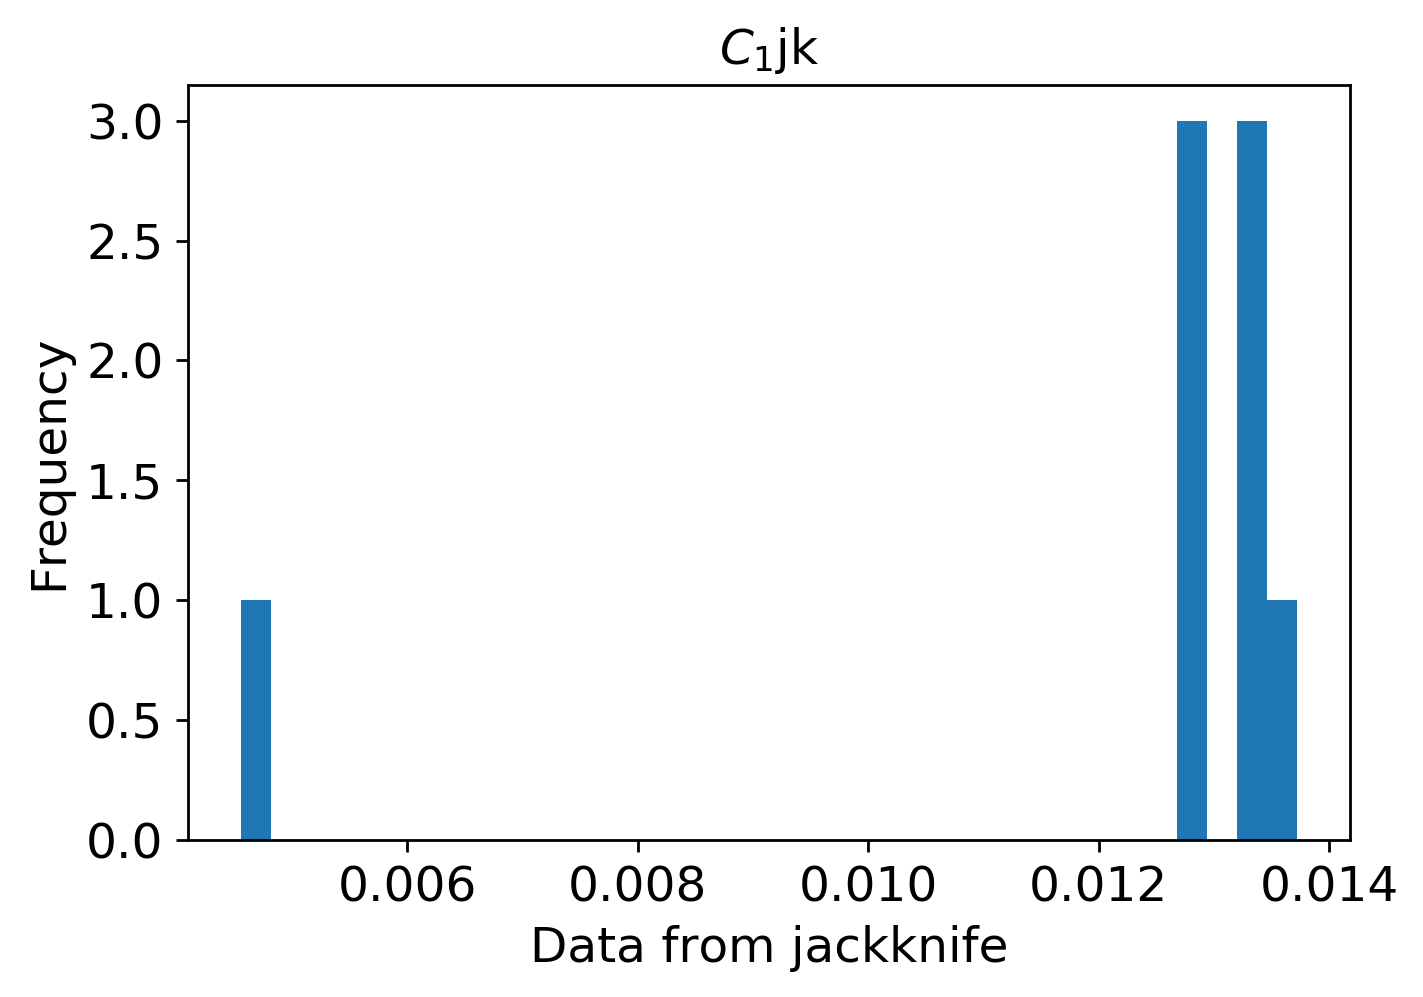

mean: 0.013787939793893415
jk_e: 0.001238454643490862
CI 0.0024273711012420896


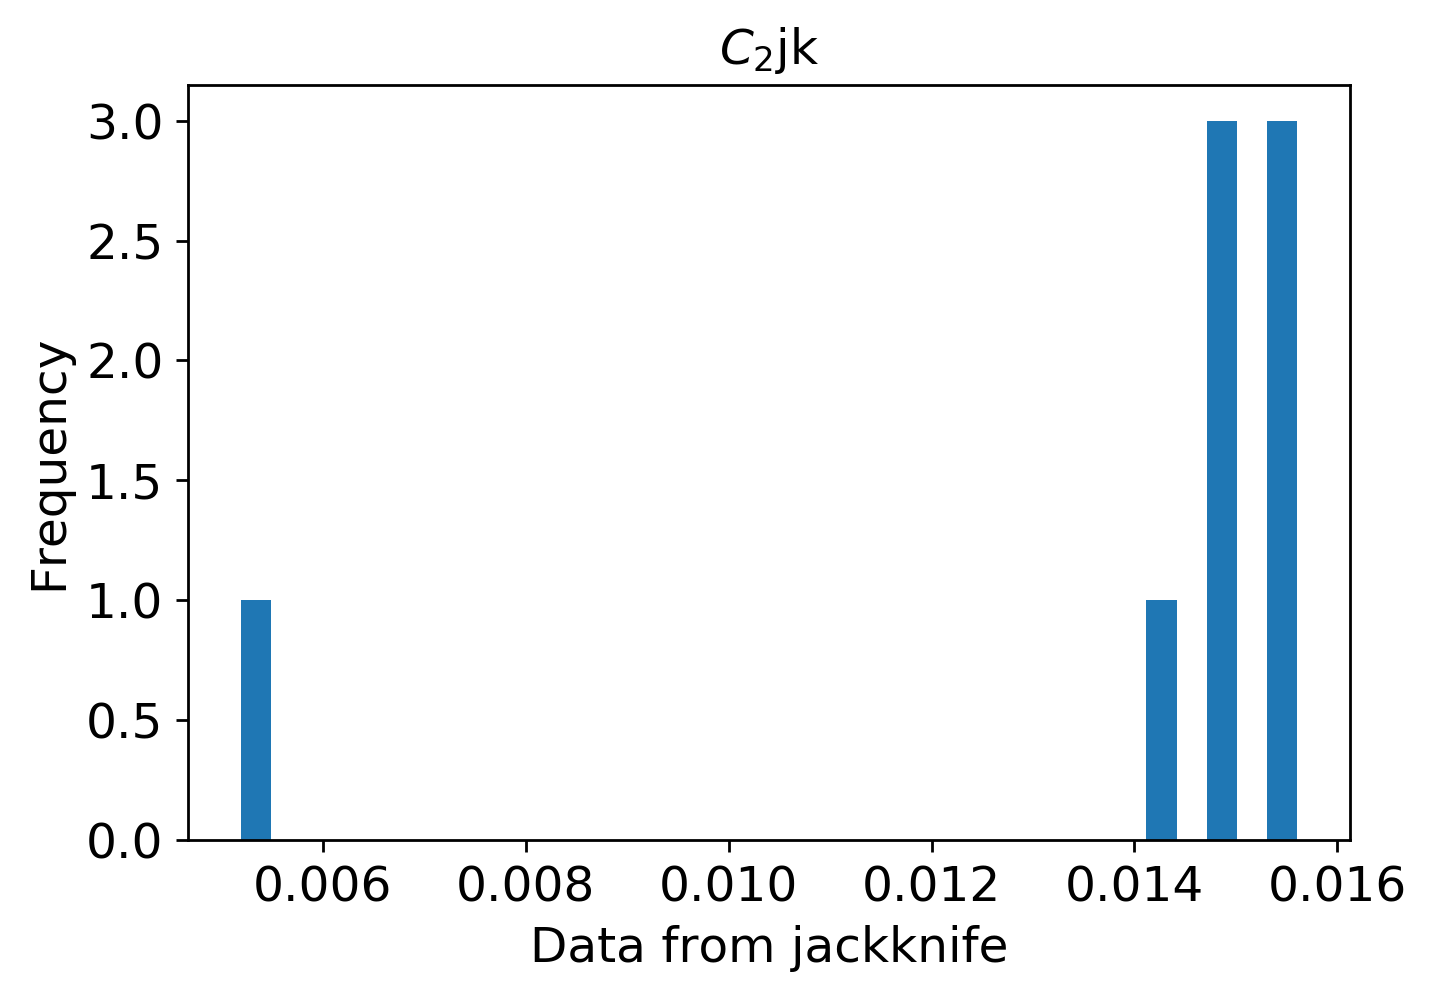

mean: 0.010728821170398107
jk_e: 0.0009707262204327366
CI 0.0019026233920481637


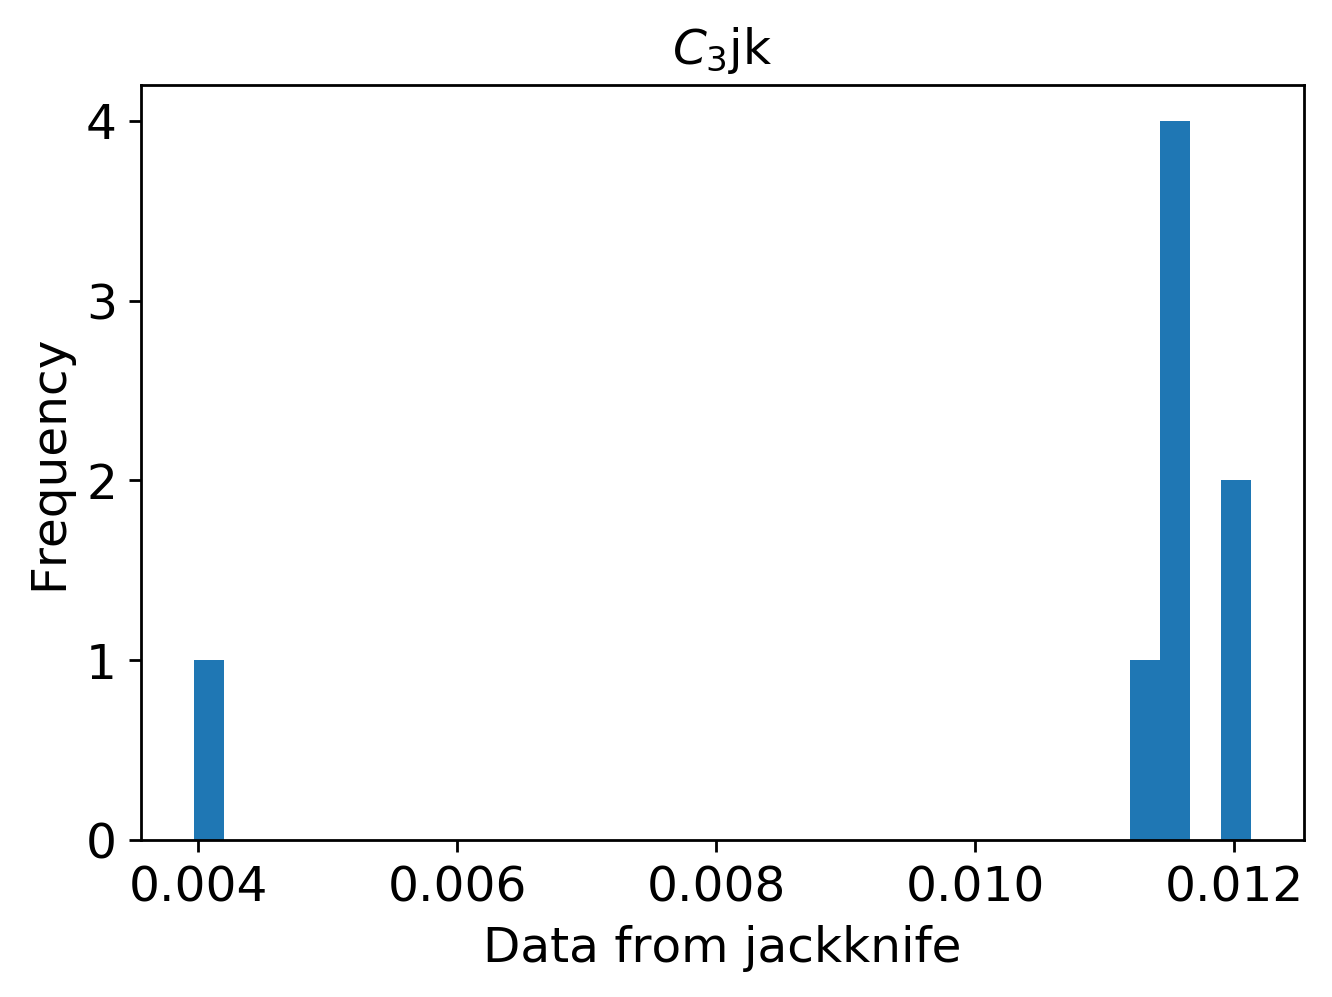

mean: 0.008271204457134479
jk_e: 0.0008398383808318312
CI 0.0016460832264303892


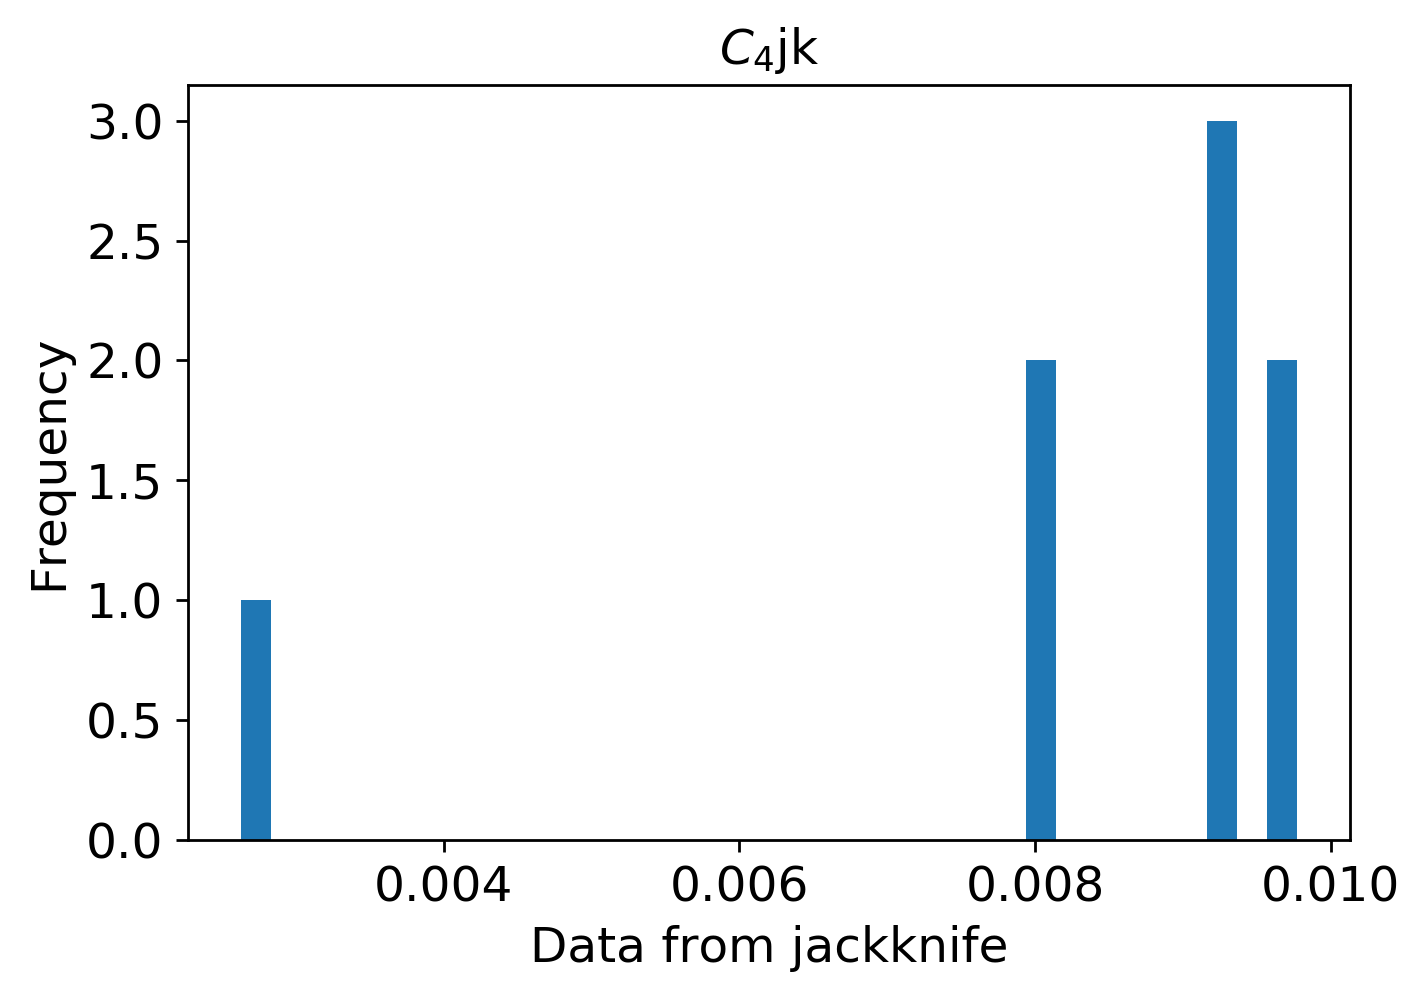

mean: 0.0034409856100097213
jk_e: 0.0004563890934255207
CI 0.0008945226231140206


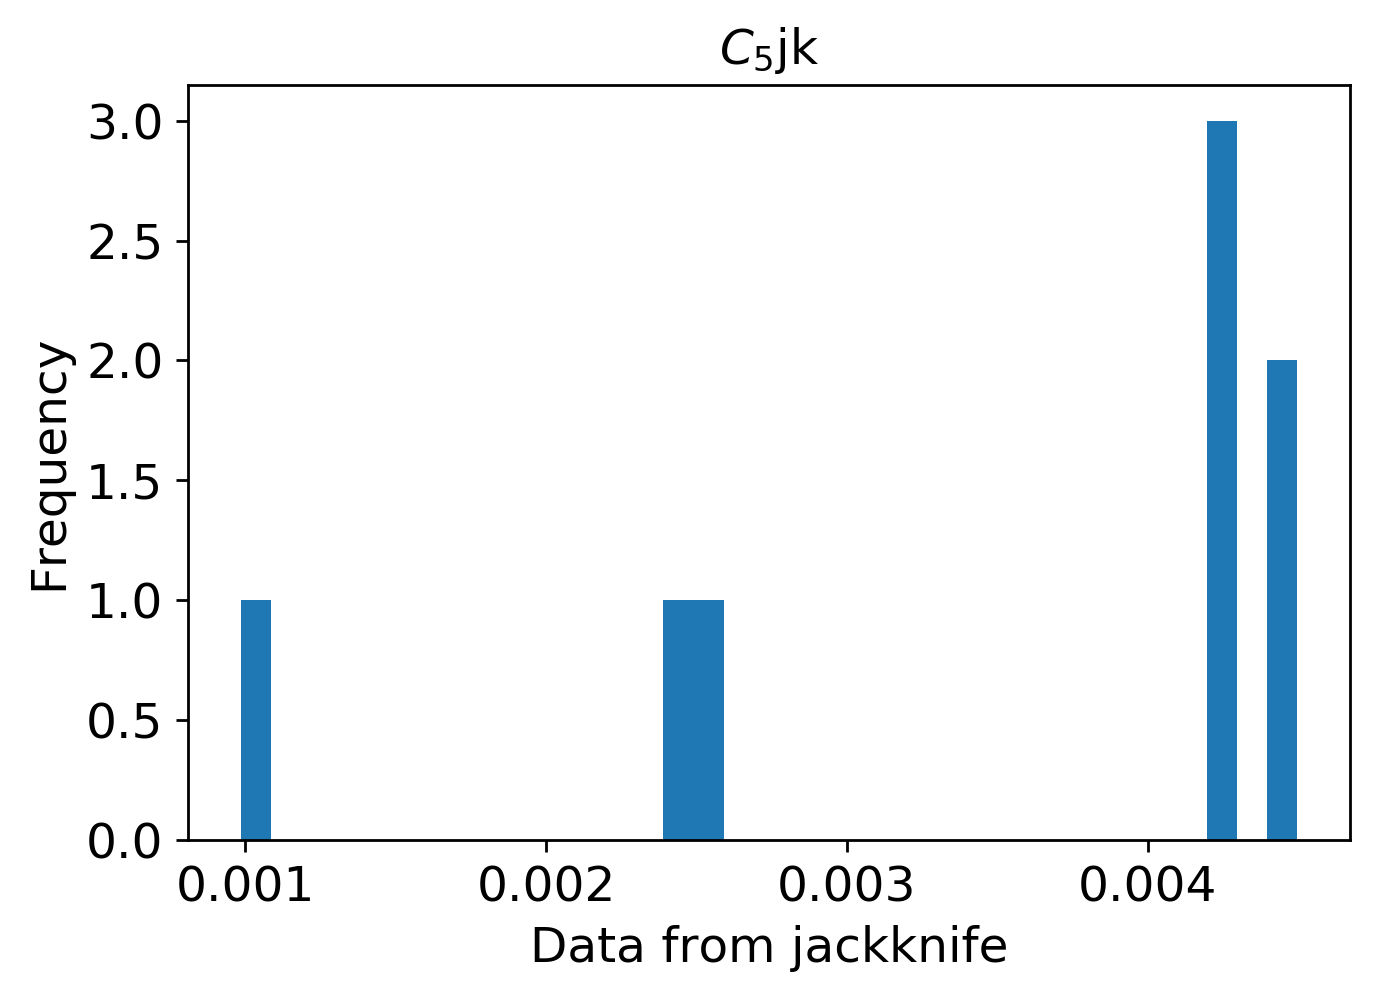

mean: 0.003134133152373014
jk_e: 0.00046486462640772316
CI 0.0009111346677591373


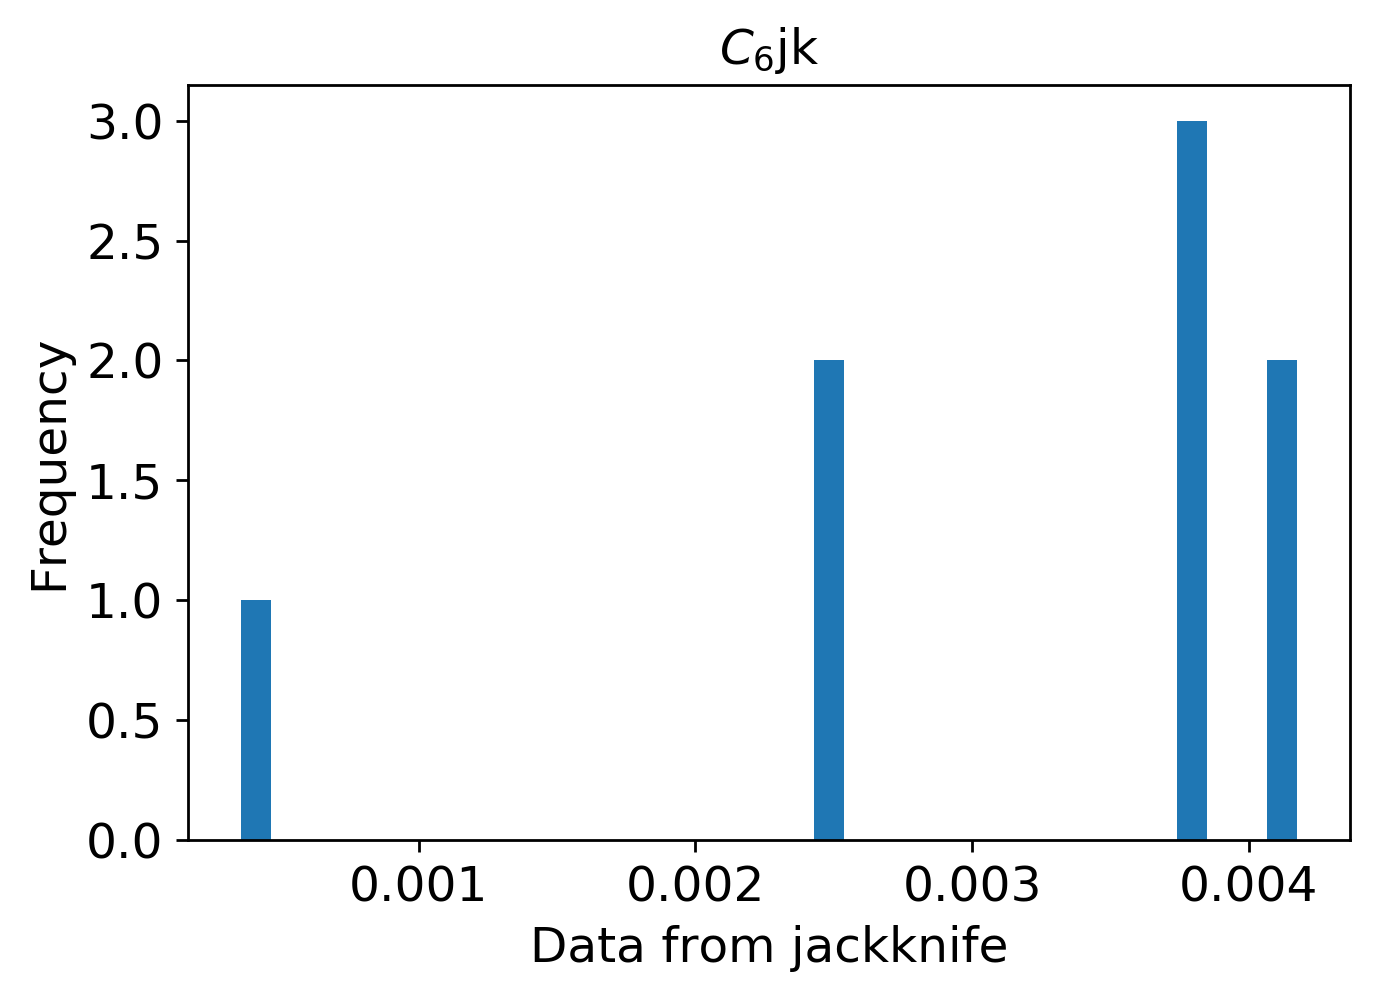

In [1]:
# Jackknife Method
import csv
import numpy as np
import pandas as pd
import math
from keras.models import load_model
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

datadir = '/home/rimali2009/Journal_2/data_g6_j2_roi770_jogan_5500_400grid/'
resdir = '/home/rimali2009/Journal_2/result_g6_j2_roi770_jogan_5500_400grid/5000/'
# Initial setting
if not "model" in locals():
    model = load_model(resdir+'model3.hdf5')
gclass = 6
#gclass_label = ["406 ${\mu}m$", "268 ${\mu}m$",
                #"177 ${\mu}m$", "117 ${\mu}m$"]
topodx = 10.0
coord_num = int(model.layers[0].input_shape[1]/gclass)
min_x, max_x = np.loadtxt(datadir + 'x_minmax.txt', delimiter=',')
y_min = np.loadtxt(datadir + 'icond_min.txt', delimiter=',')
y_max = np.loadtxt(datadir + 'icond_max.txt', delimiter=',')


a = pd.read_csv(
    '../Journal_2/jogan_gs6_range.csv', delimiter=',')
print(a)
y = pd.DataFrame()
output = []

with open('output_final_jogan_gs6.csv', 'w') as outfile:

    # x=[]
    for index in range(len(a)):
        df = y.append(pd.read_csv(
            '../Journal_2/jogan_gs6_range.csv', skiprows=[index+1]))
        print(df)
        df = df.sort_values('distance')
        thick_interp = np.zeros([1, coord_num*gclass])
        x = np.arange(0, coord_num*topodx, topodx)
        for j in range(gclass):
            # Interpolation function of jth granularity level
            f = interp1d(df['distance'], df.iloc[:, j+1],
                         kind="cubic", bounds_error=False,fill_value='extrapolate')
            thick_interp[0, coord_num*j:coord_num*(j+1)] = f(x)
        thick_interp[thick_interp < 0] = 0
        thick_interp_norm = (thick_interp - min_x) / (max_x - min_x)
        test_result_outcrop = model.predict(thick_interp_norm)
        test_result_outcrop = test_result_outcrop * (y_max - y_min) + y_min
        print(test_result_outcrop.shape)
        print(test_result_outcrop)
    # output.append(test_result_outcrop)
        np.savetxt(outfile,test_result_outcrop, delimiter=',')
        # outfile.write('# New iteration\n')
hfont = {'fontname': 'Century Gothic'}
textcol = 'k'
resi = np.loadtxt('output_final_jogan_gs6.csv', delimiter=',')
titlelabel = ['Max. Inundation Lengthjk','Flow Velocityjk', 'Max Flow depthjk',
              '$C_1$jk', '$C_2$jk', '$C_3$jk', '$C_4$jk','$C_5$jk','$C_6$jk']
jk_er=[]
with open('jk_e_770jogan_g6','wb') as ftext:
    for i in range(len(titlelabel)):
        plt.figure(num=None, dpi=250, facecolor='w', edgecolor='k')
        plt.hist(resi[:, i], bins=35)
        mean = sum(resi[:,i]) / len(resi[:,i])
        print("mean:",mean)
        var_jk  = sum(pow(x-mean,2) for x in resi[:,i]) / ((len(resi[:,i])-1)*(len(resi[:,i])))
        jk_e= math.sqrt(var_jk)
        #ci_u=mean+(1.96*jk_e)
        #ci_l=mean-(1.96*jk_e)
        CI=(1.96*jk_e)
        print("jk_e:",jk_e)
        #print("CI_u", ci_u)
        #print("CI_l",ci_l)
        print("CI",CI)
        e=np.append(jk_e,jk_er)
        np.savetxt(ftext,e,delimiter=',')
        plt.title(titlelabel[i], color=textcol, size=14, **hfont)
        plt.xlabel('Data from jackknife', color=textcol, size=14, **hfont)
        plt.ylabel('Frequency', color=textcol, size=14, **hfont)
        plt.tick_params(labelsize=14, colors=textcol)
        plt.savefig(resdir+titlelabel[i] + 'jkhistrev' + '.eps')
        plt.savefig(resdir+titlelabel[i] + 'jkhistrev' + '.pdf')
        plt.show()

     distance       507       439       380       329       285       246
0    0.000000  0.024882  0.025905  0.018931  0.009775  0.002780  0.001823
1  109.646182  0.018199  0.018501  0.013078  0.006499  0.001484  0.001124
2  450.682215  0.006643  0.006792  0.004816  0.002317  0.000413  0.000318
3  543.078703  0.012463  0.013668  0.010783  0.005352  0.001210  0.000867
4  674.221738  0.010797  0.014157  0.013181  0.007667  0.003387  0.000792
5  766.825235  0.005089  0.007598  0.007365  0.004642  0.002498  0.000285
6  879.030860  0.000831  0.001224  0.001200  0.000772  0.000433  0.000045
7  965.302169  0.002988  0.004698  0.004945  0.003641  0.002568  0.000113
[[0.16716794 0.15104327 0.13586075 ... 0.12063097 0.11999467 0.11936136]
 [0.05369505 0.04874209 0.04408988 ... 0.00686037 0.00663074 0.00640121]
 [0.08213634 0.07935154 0.07666218 ... 0.06740283 0.06677778 0.06616954]
 ...
 [0.07286905 0.06735085 0.06213458 ... 0.01767082 0.01765938 0.01764555]
 [0.26572667 0.23483882 0.20588377 ..

/home/rimali2009/anaconda3/envs/test3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


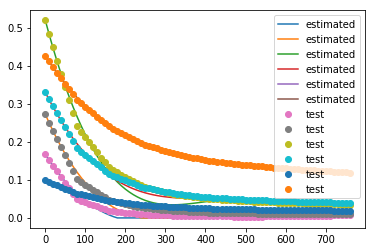

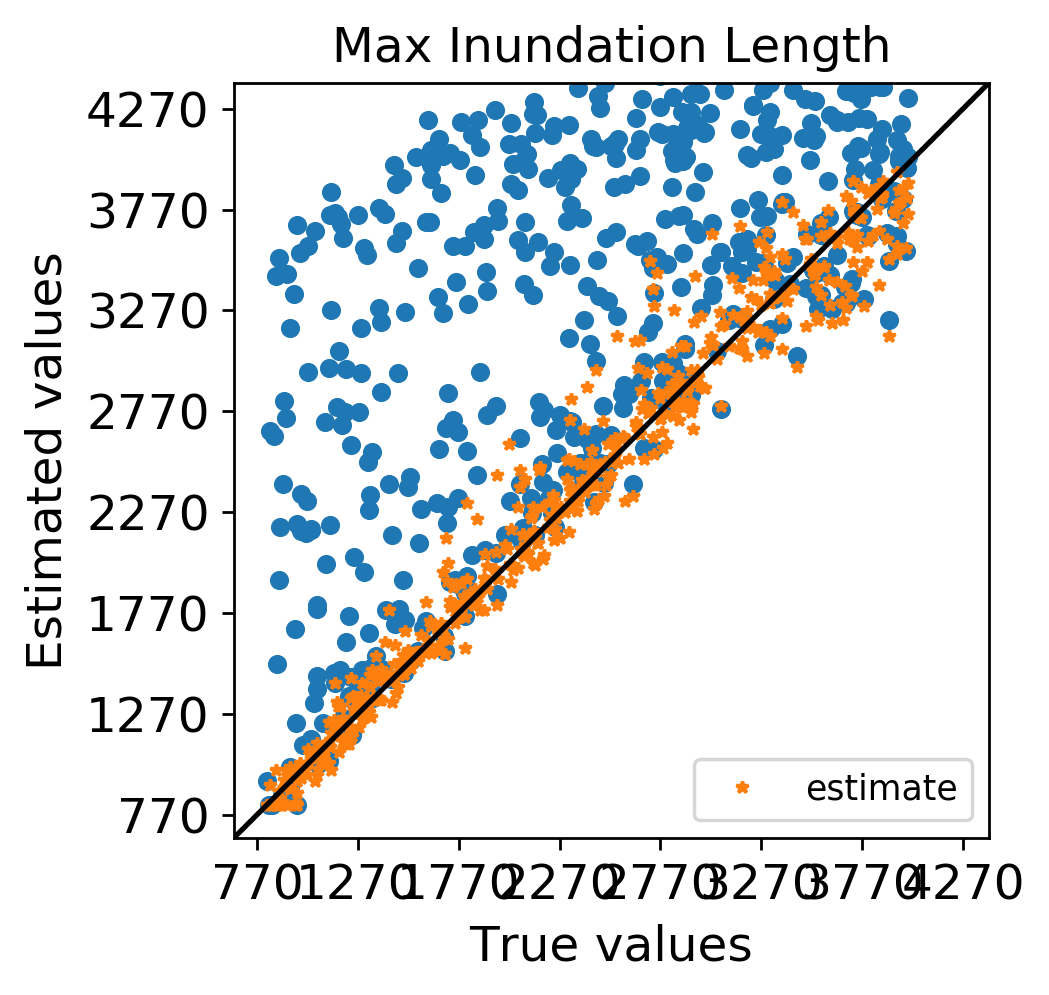

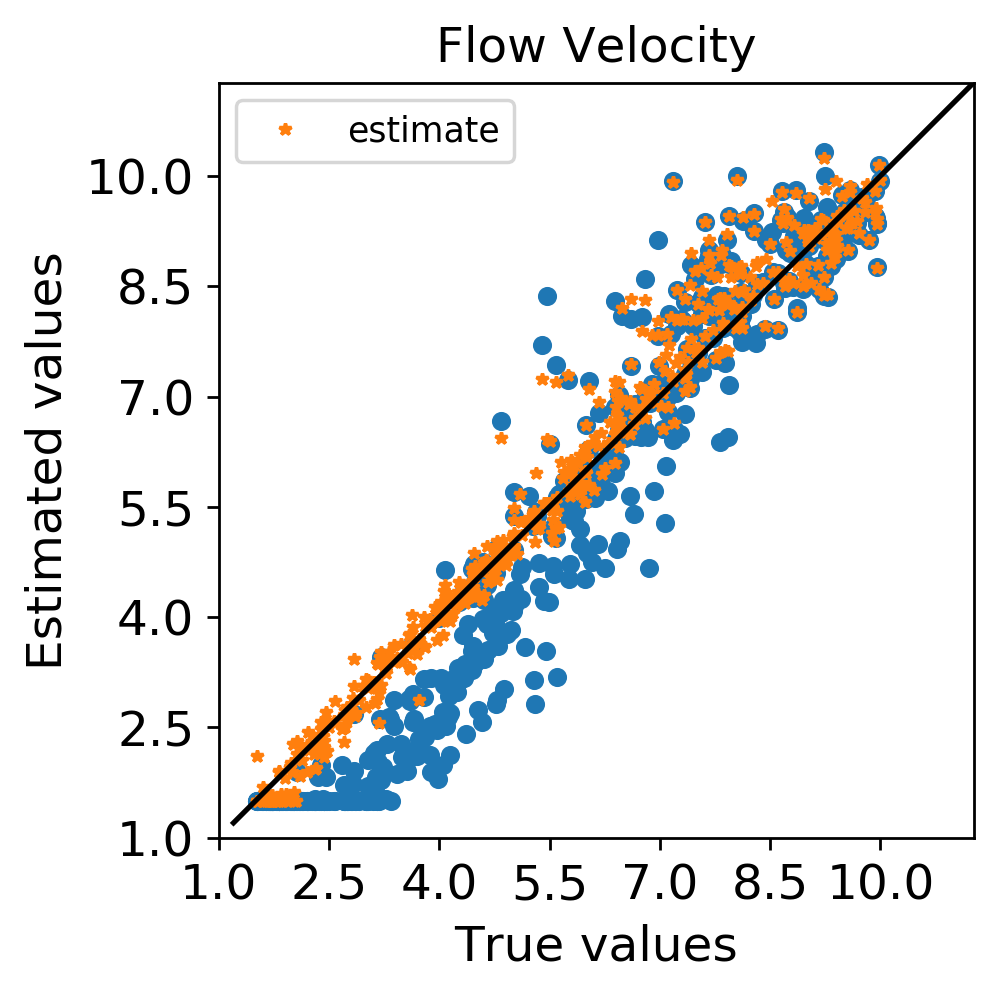

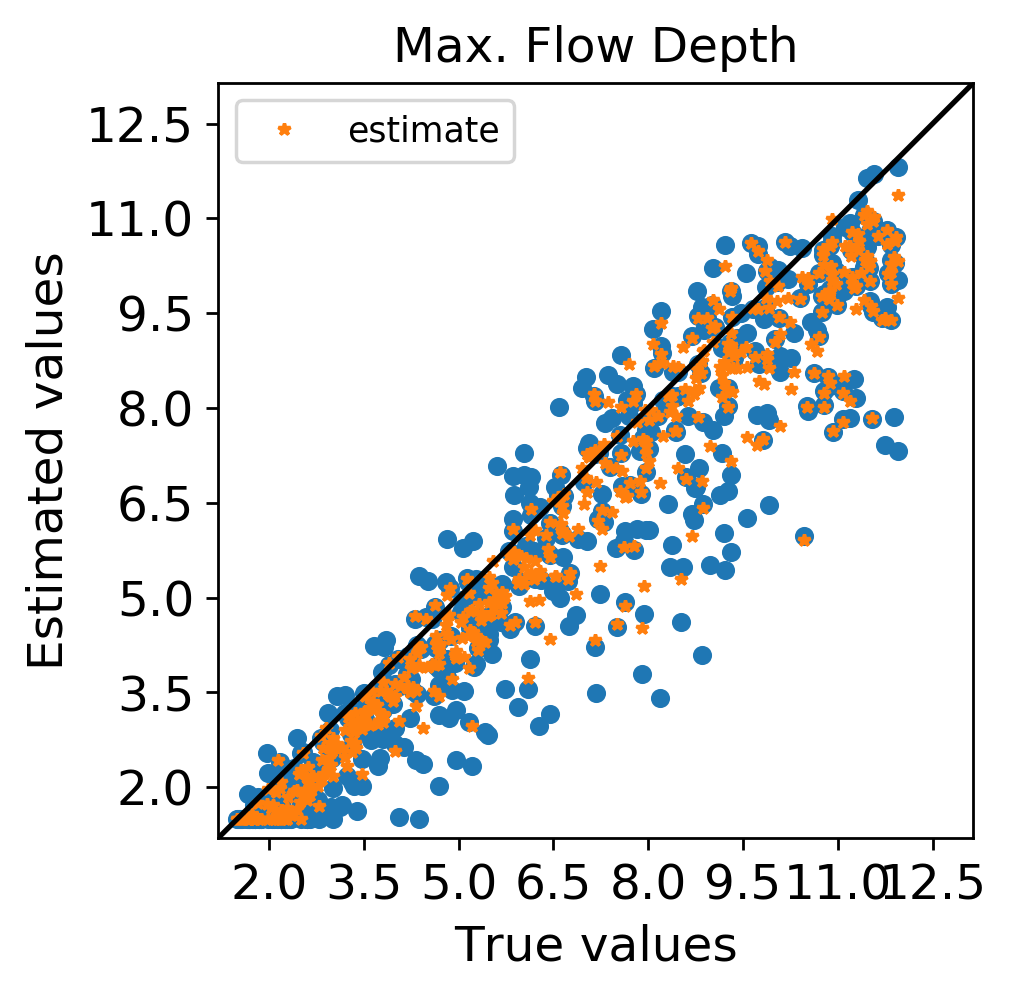

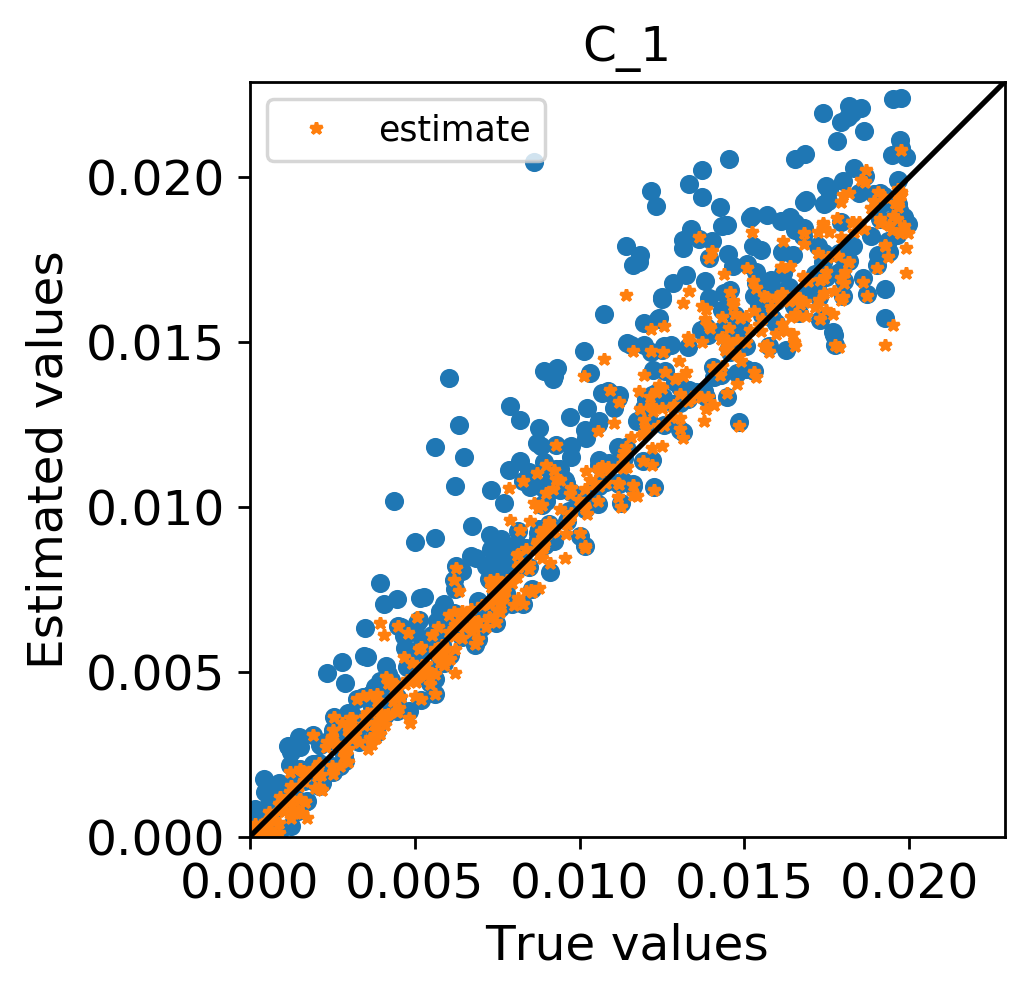

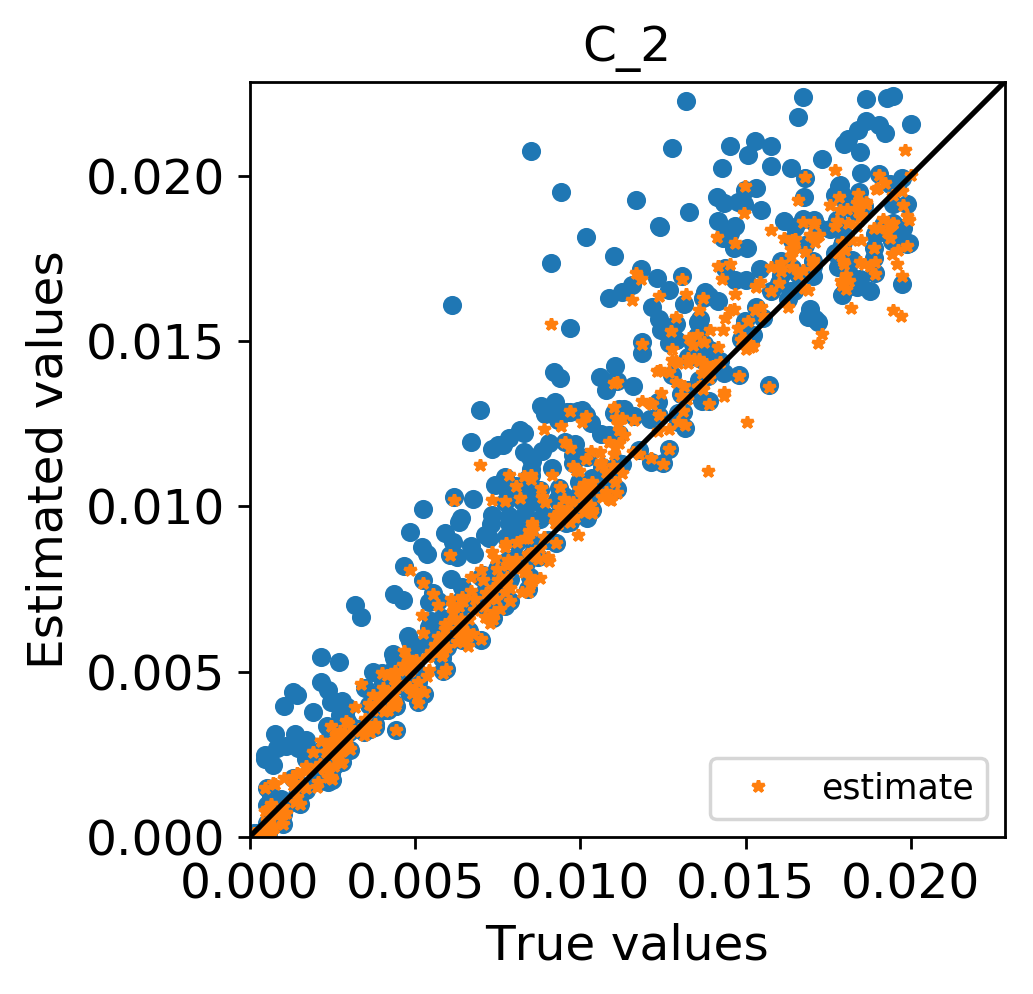

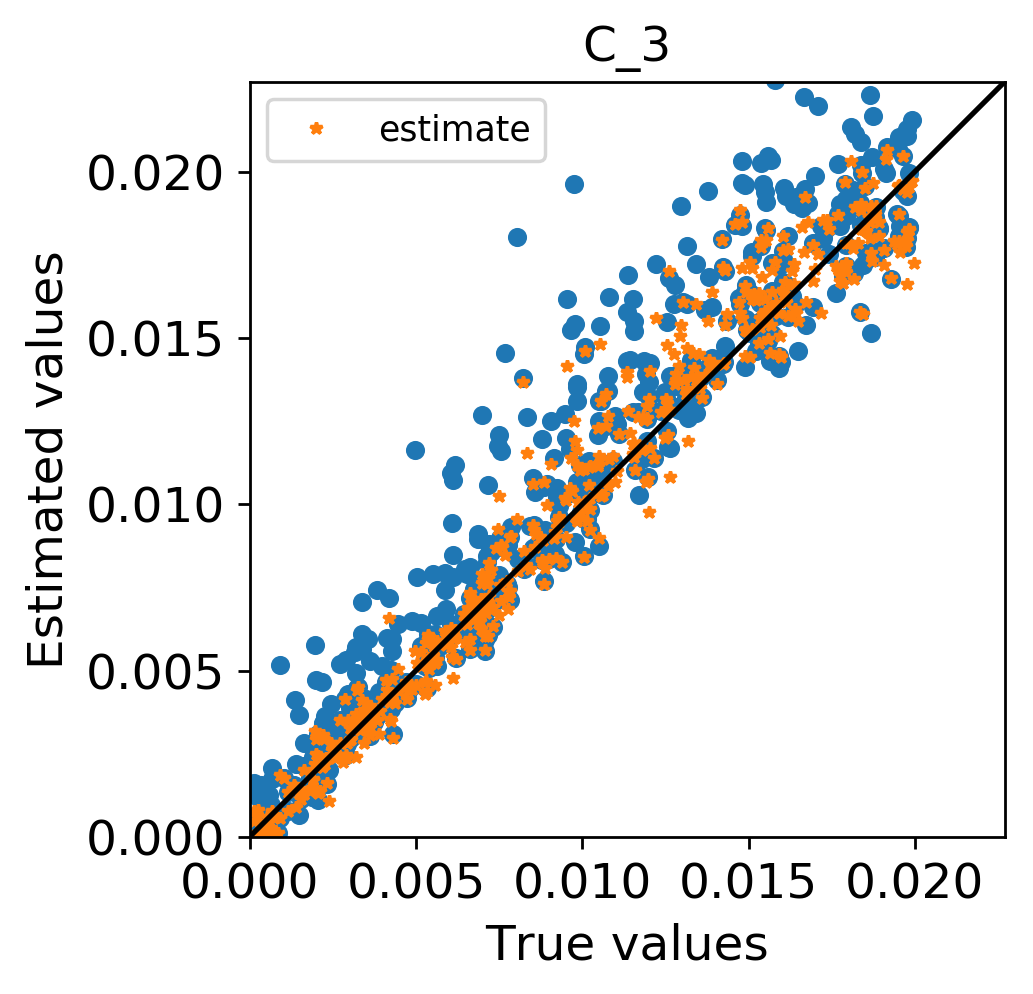

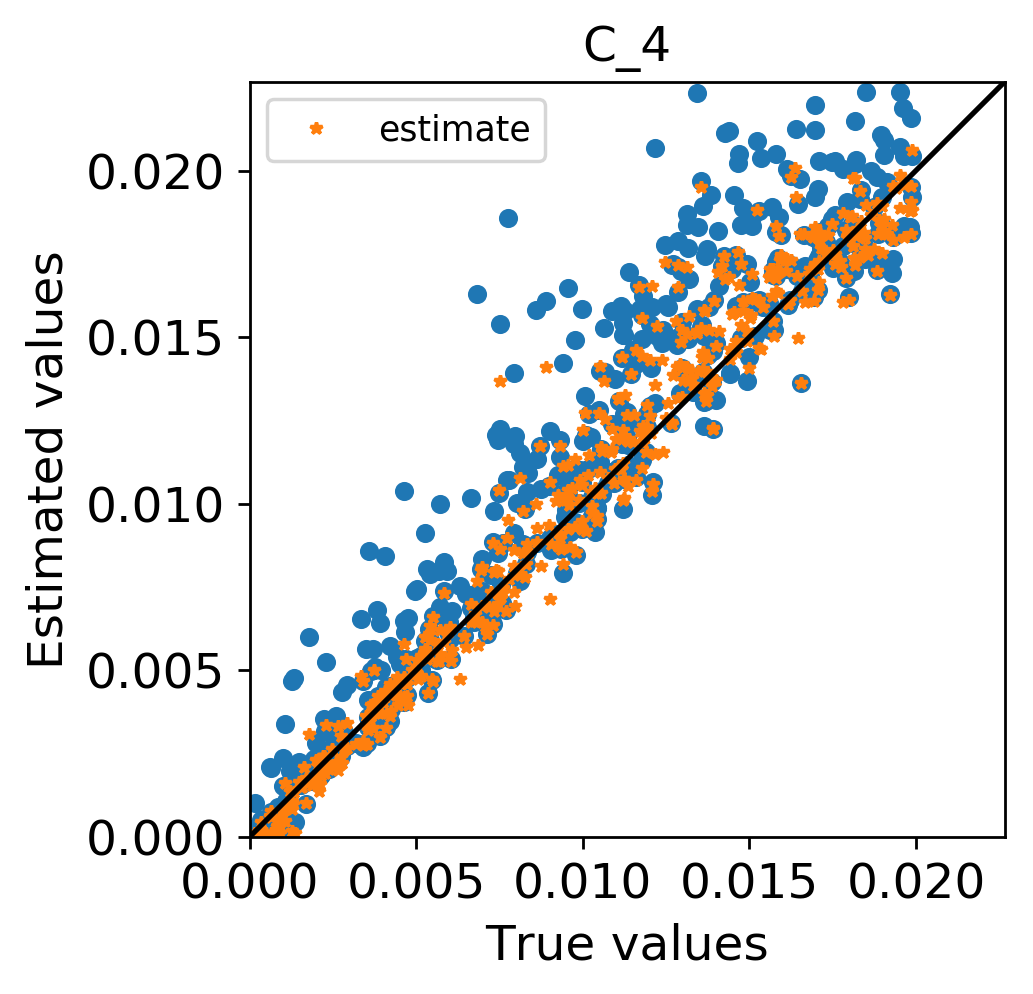

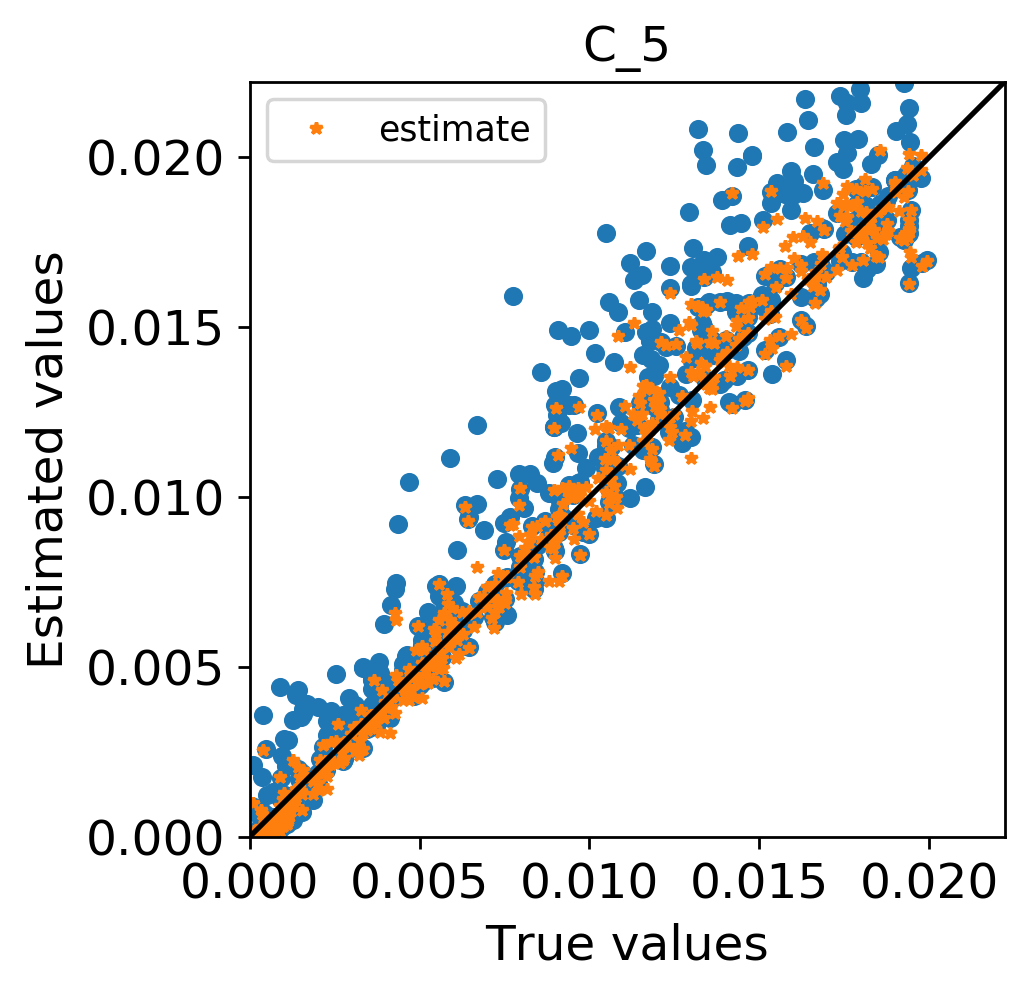

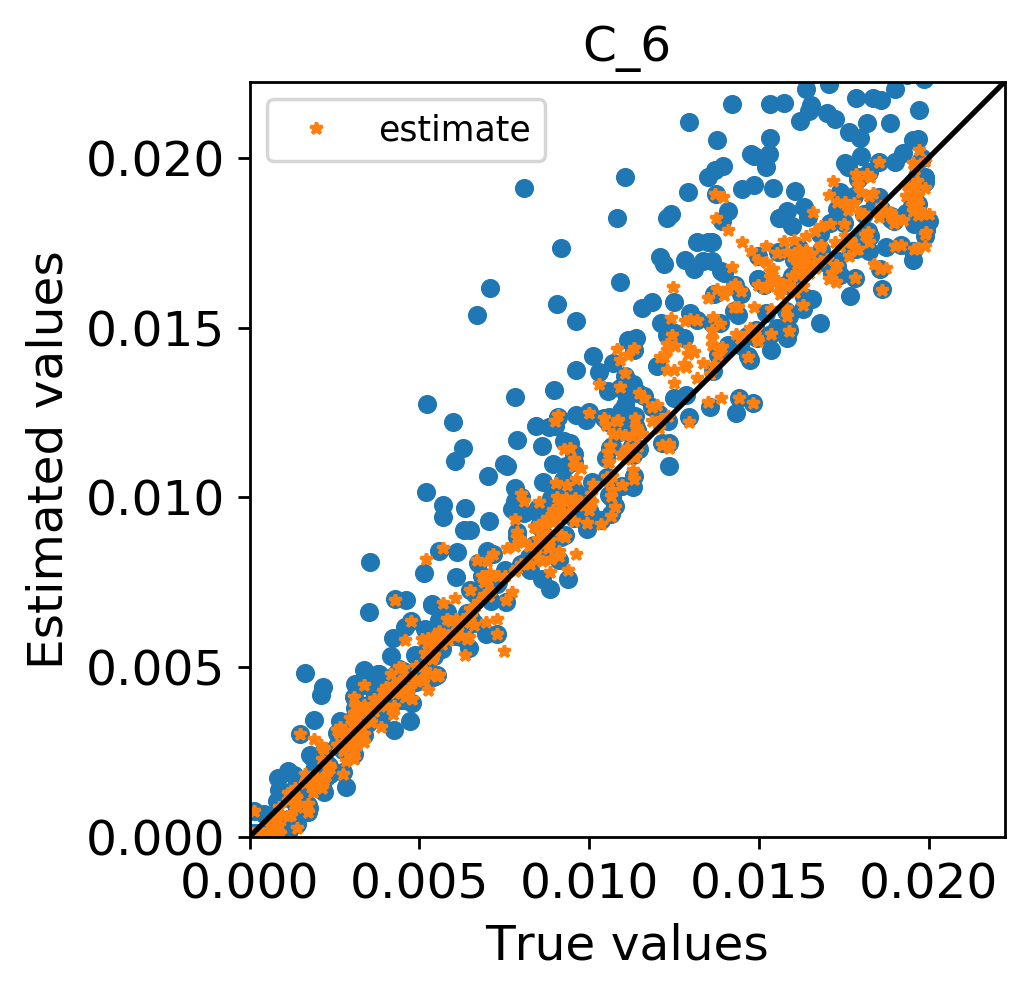

Standard Deviation sample: 800.5853986410052
Mean: 817.996108626154
mode ModeResult(mode=array([-681.2550493]), count=array([1]))
m 621.3690878805135


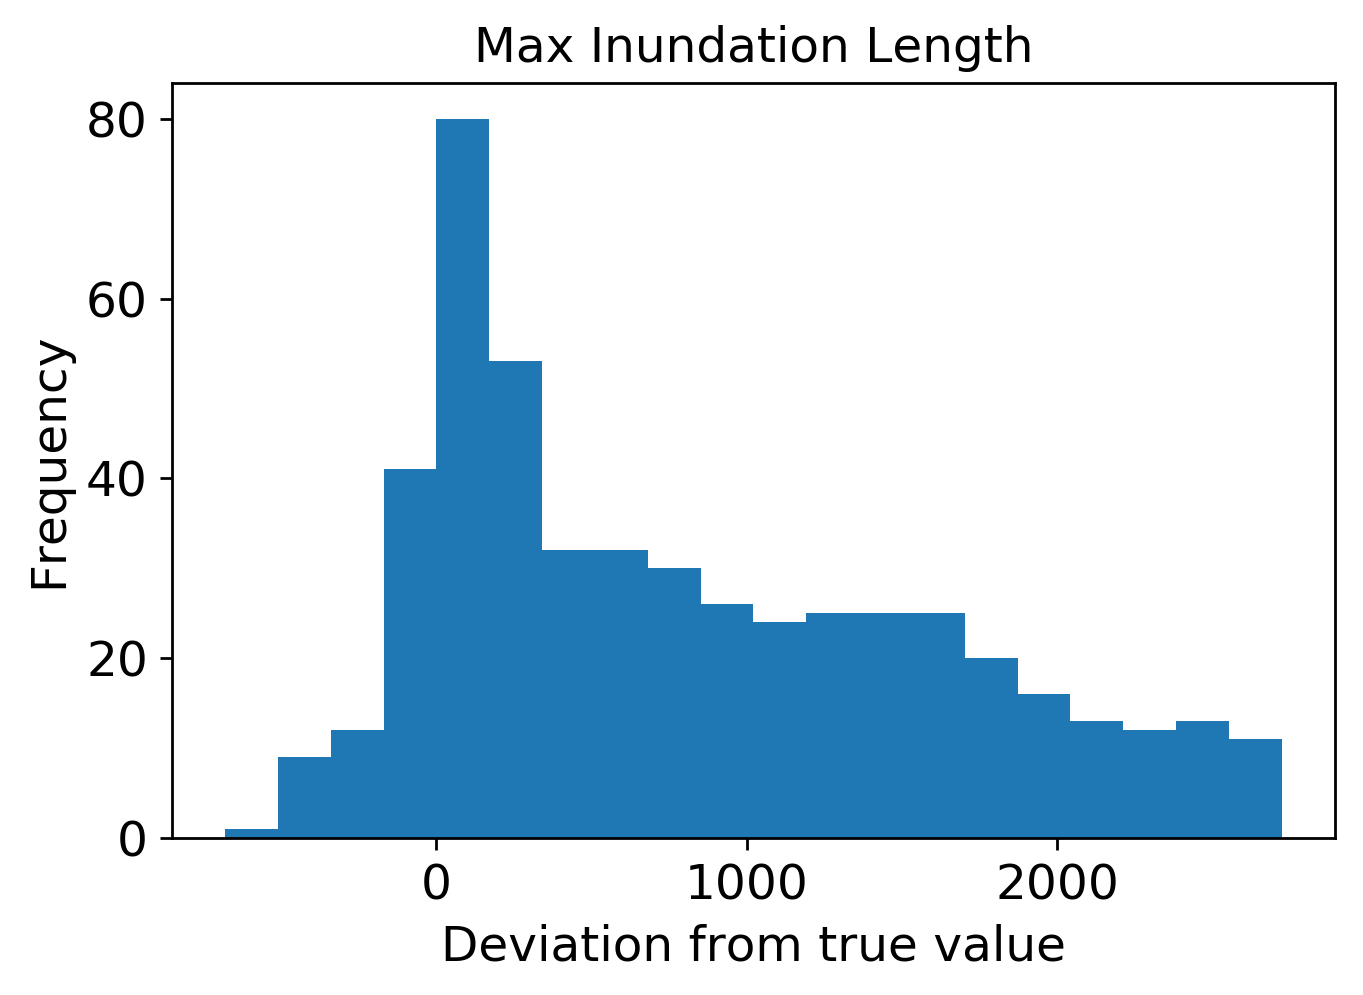

Standard Deviation sample: 0.8287042247234411
Mean: -0.3476231689592234
mode ModeResult(mode=array([-2.49183936]), count=array([1]))
m -0.3256130463034612


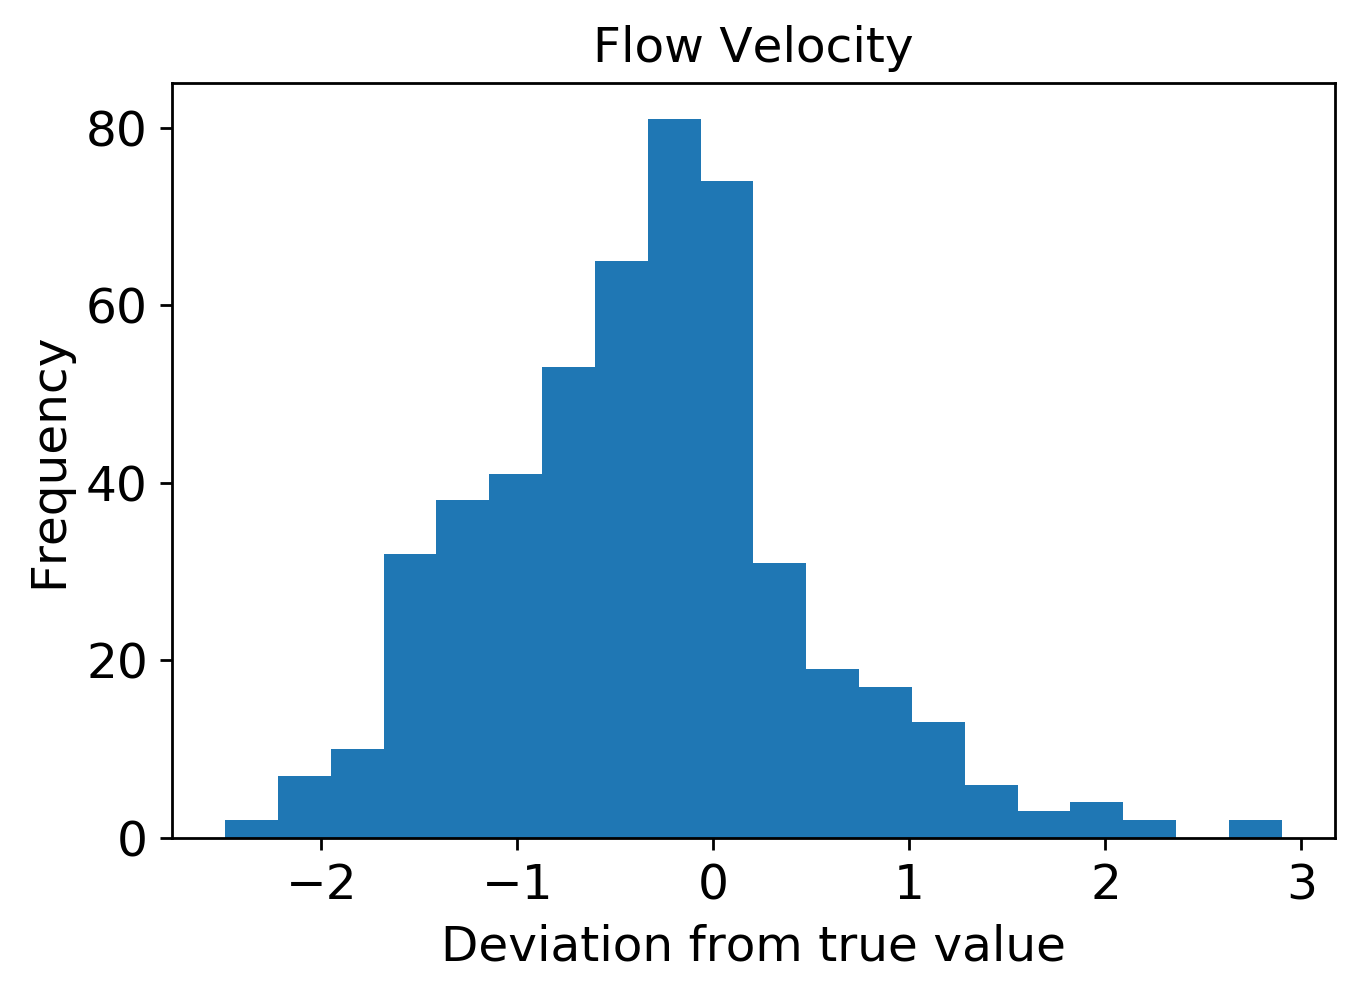

Standard Deviation sample: 1.1051078653884996
Mean: -0.7980289498799567
mode ModeResult(mode=array([-4.78247055]), count=array([1]))
m -0.6258319616234873


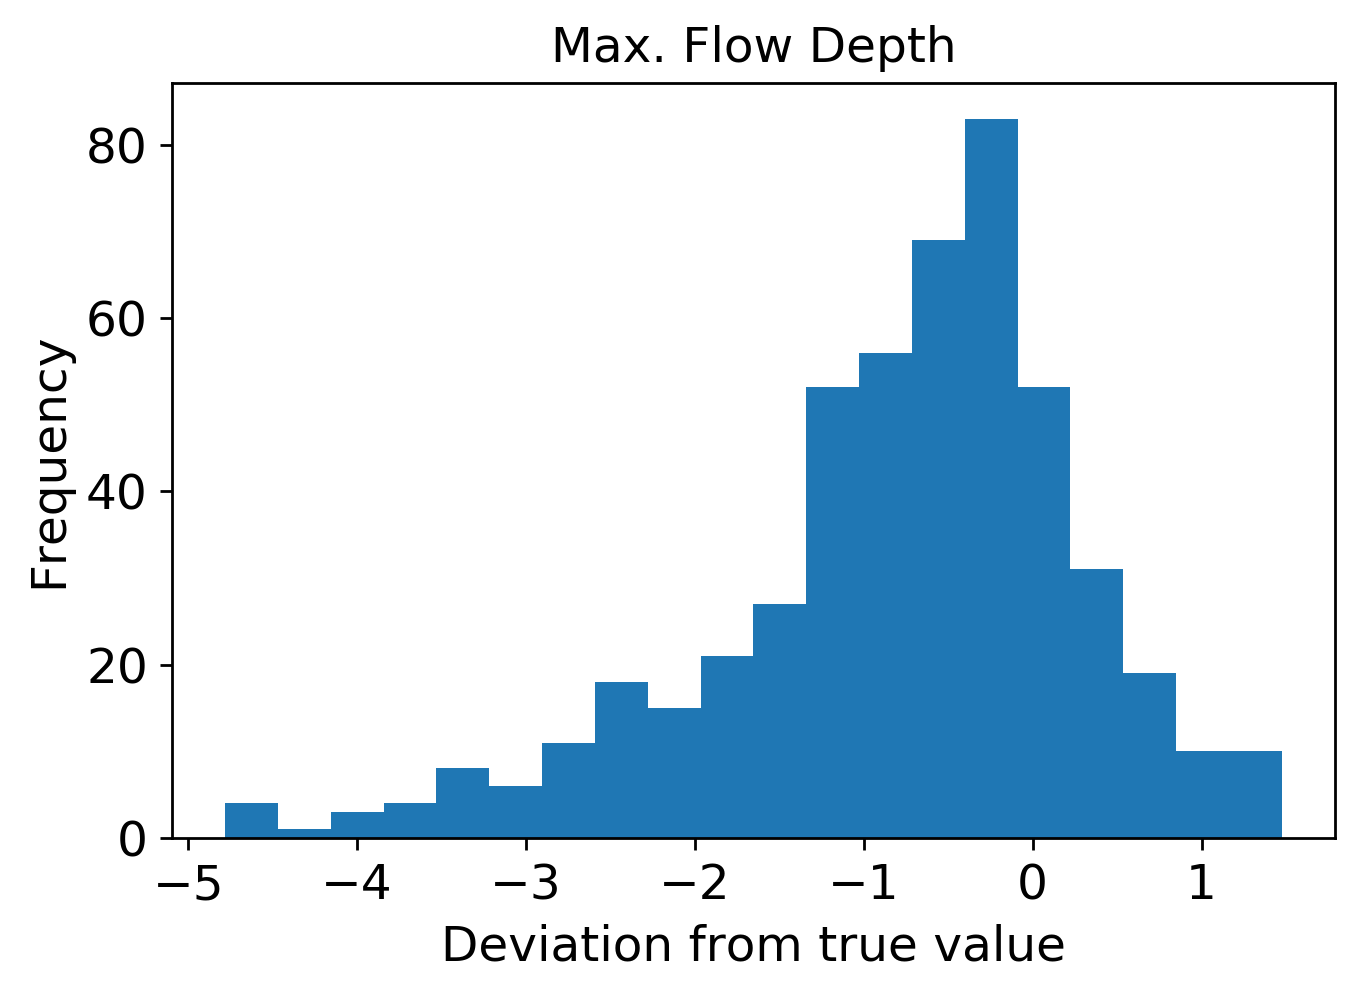

Standard Deviation sample: 0.001855730876466362
Mean: 0.00105894797140297
mode ModeResult(mode=array([-0.00353665]), count=array([1]))
m 0.0005881017908288245


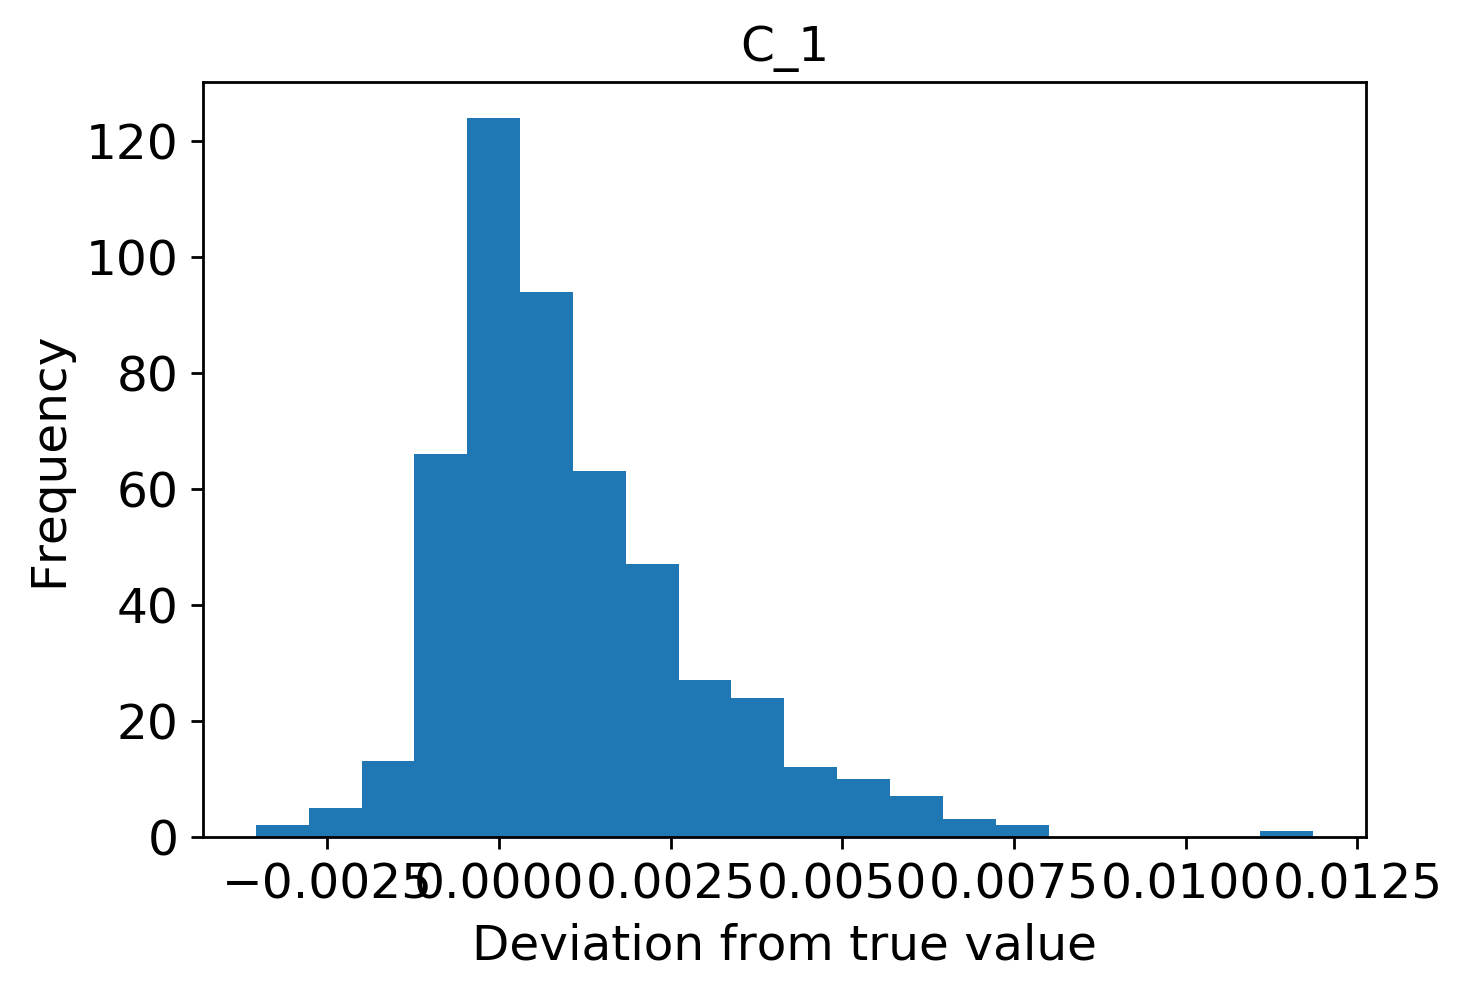

Standard Deviation sample: 0.002009728417595618
Mean: 0.0013366876350436462
mode ModeResult(mode=array([-0.00302191]), count=array([1]))
m 0.0007901892975418299


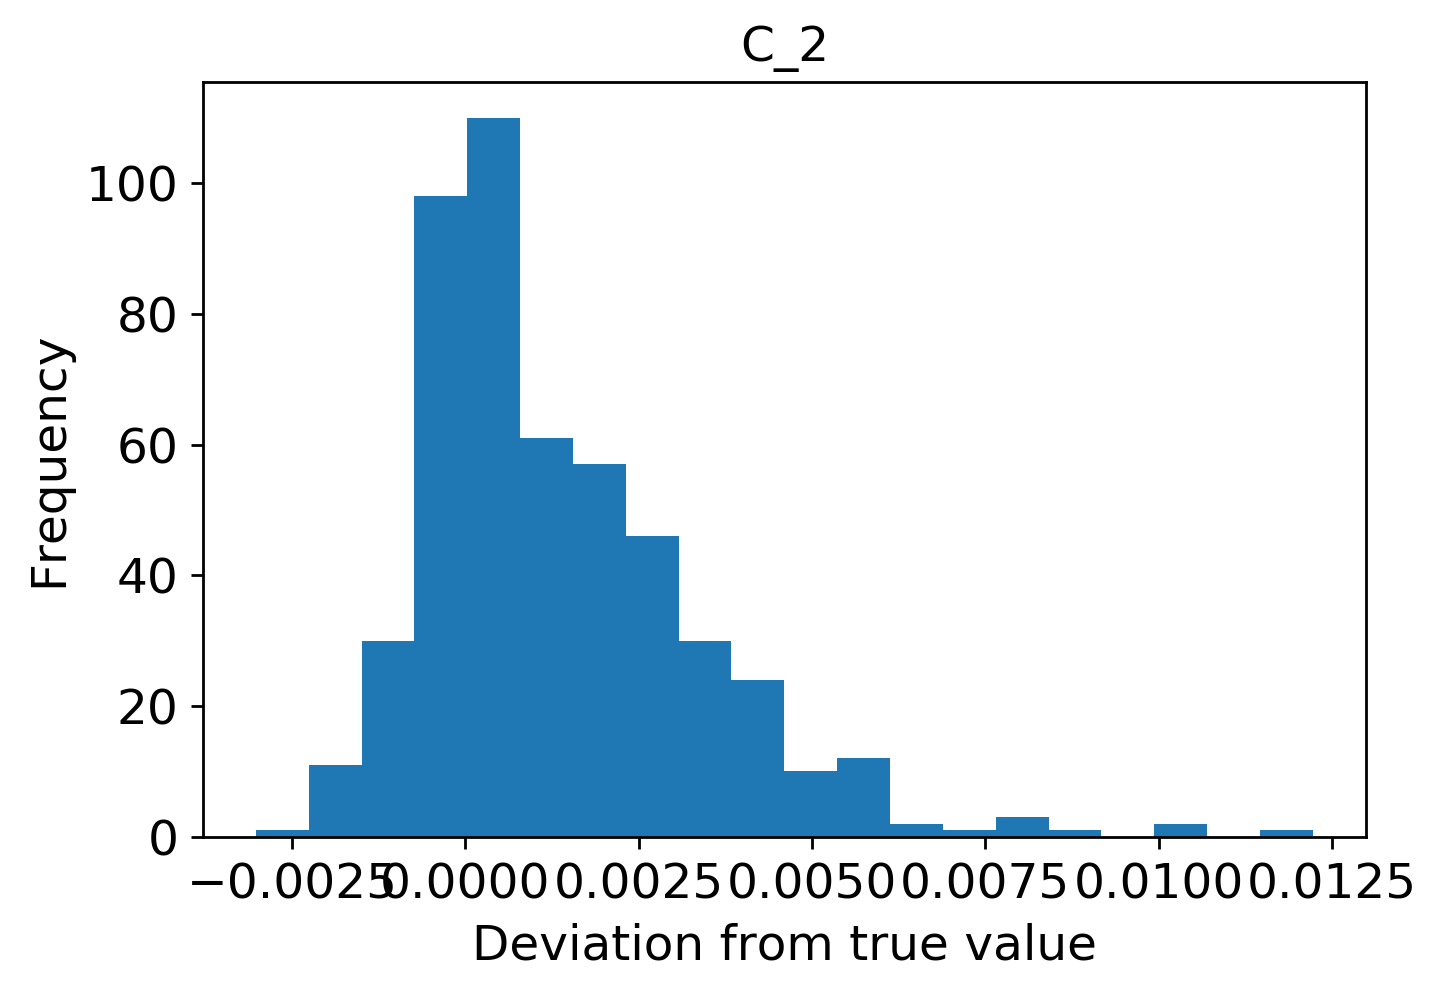

Standard Deviation sample: 0.0018350962111767892
Mean: 0.0010634715875630855
mode ModeResult(mode=array([-0.00353608]), count=array([1]))
m 0.0006628986483831235


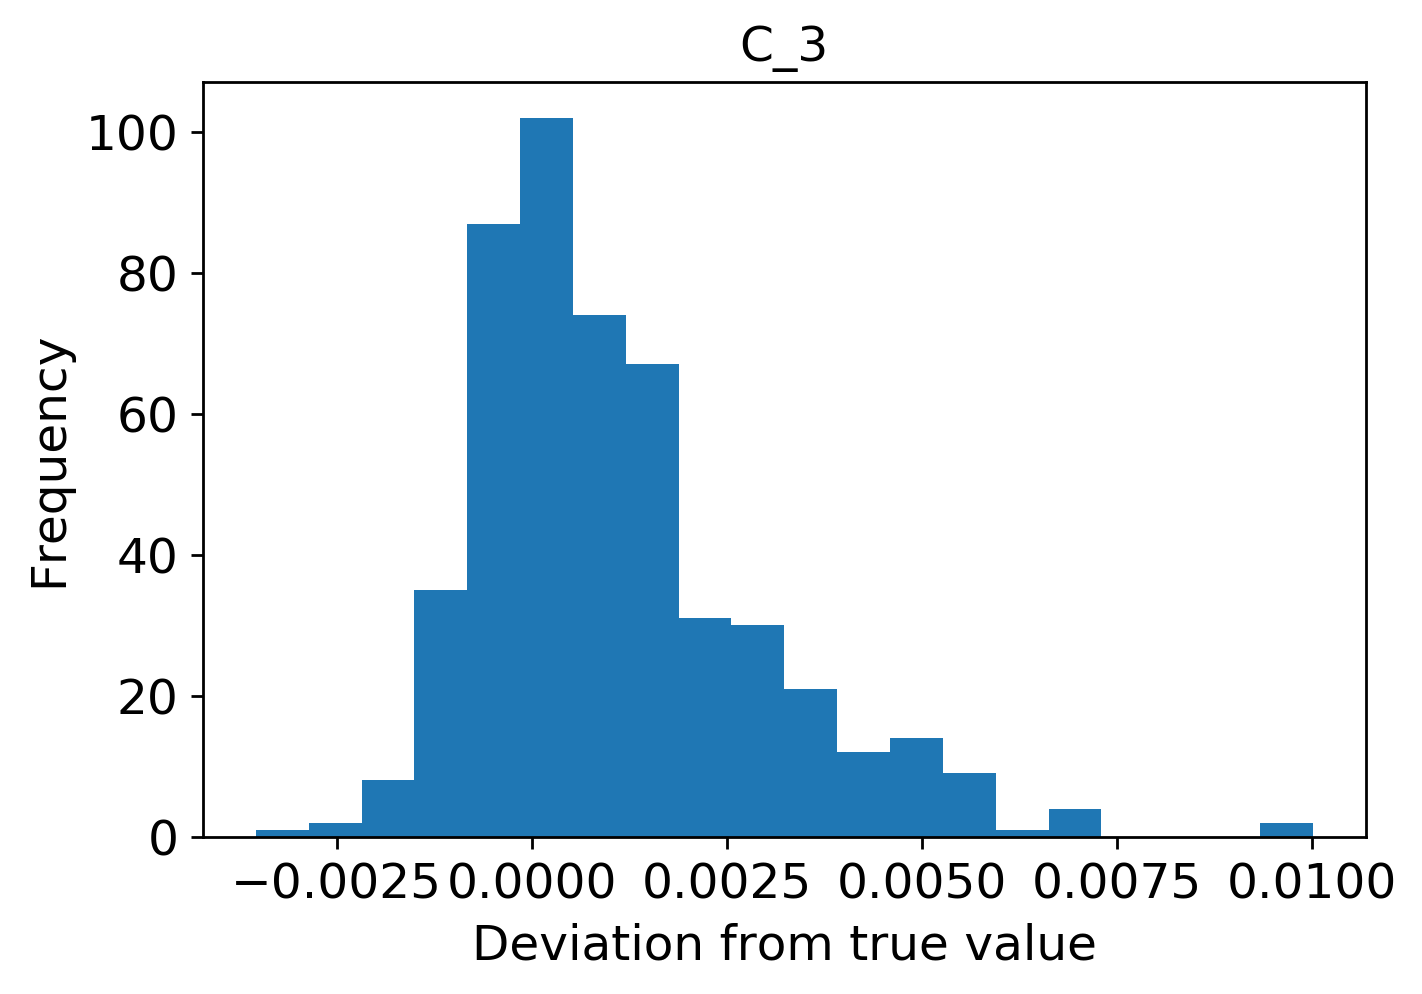

Standard Deviation sample: 0.0020603059913580795
Mean: 0.0013397082354882997
mode ModeResult(mode=array([-0.00294896]), count=array([1]))
m 0.0008041171110886175


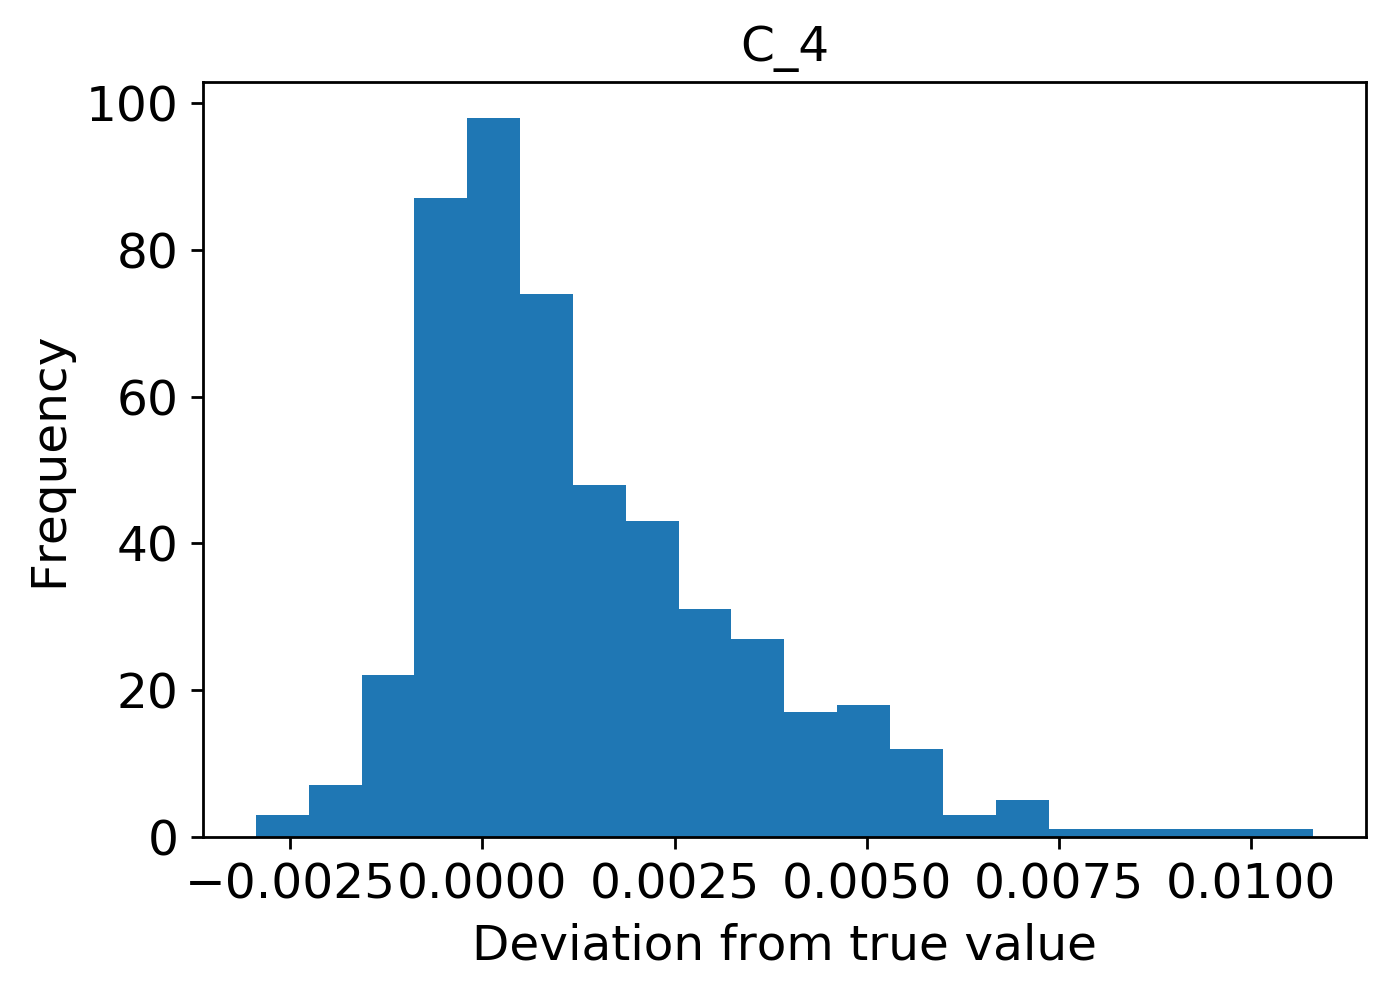

Standard Deviation sample: 0.001876909053059707
Mean: 0.0010641884429697548
mode ModeResult(mode=array([-0.0031137]), count=array([1]))
m 0.0005584755992476494


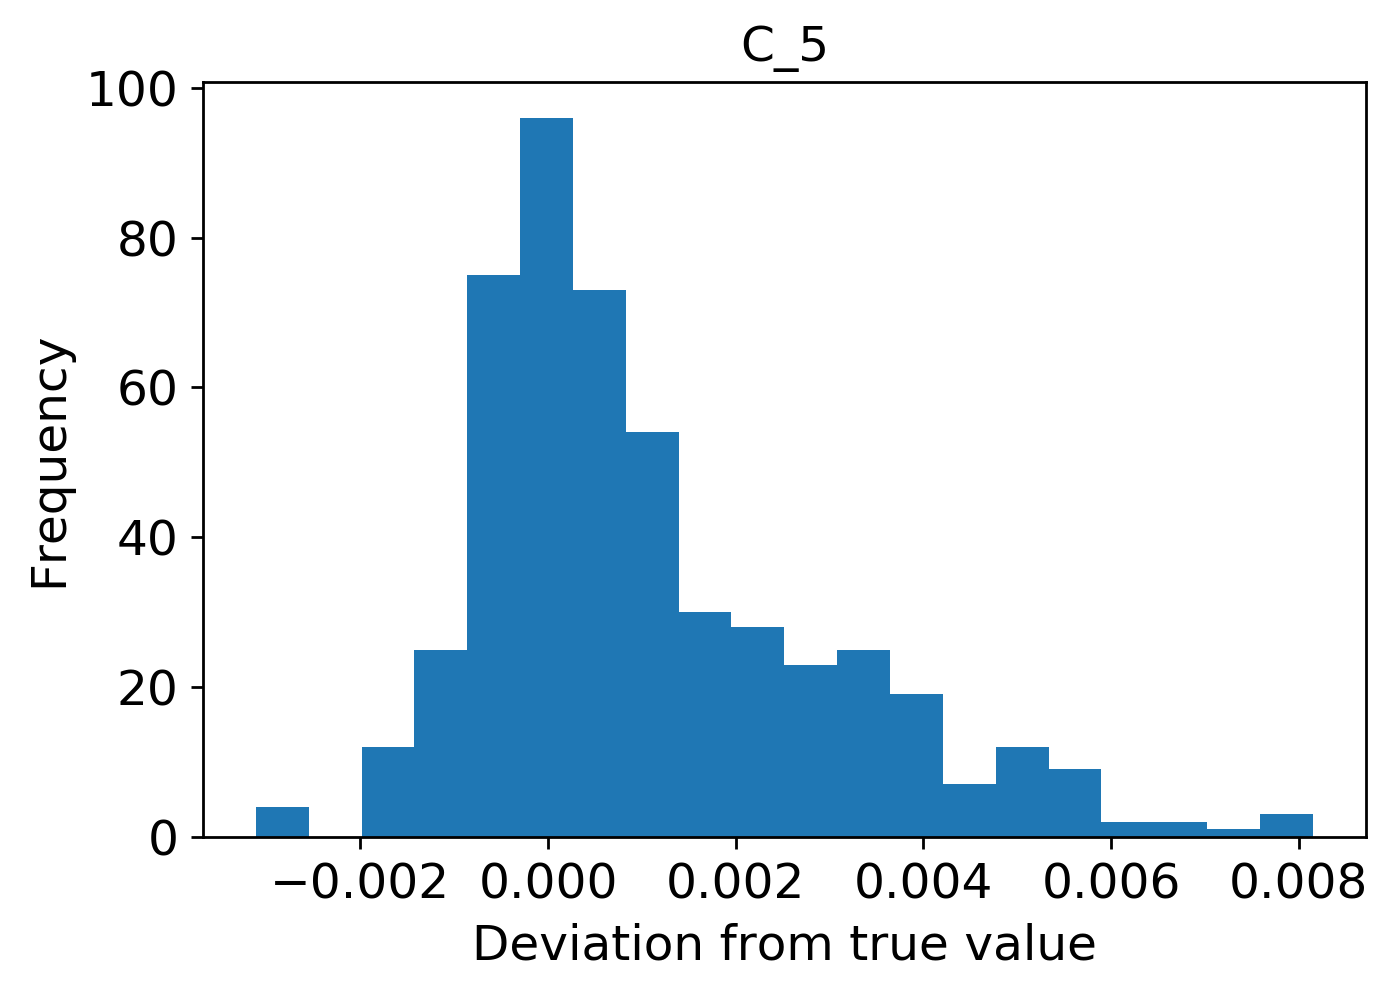

Standard Deviation sample: 0.002160335277343708
Mean: 0.0012164404864385796
mode ModeResult(mode=array([-0.00253114]), count=array([1]))
m 0.0005041036910696939


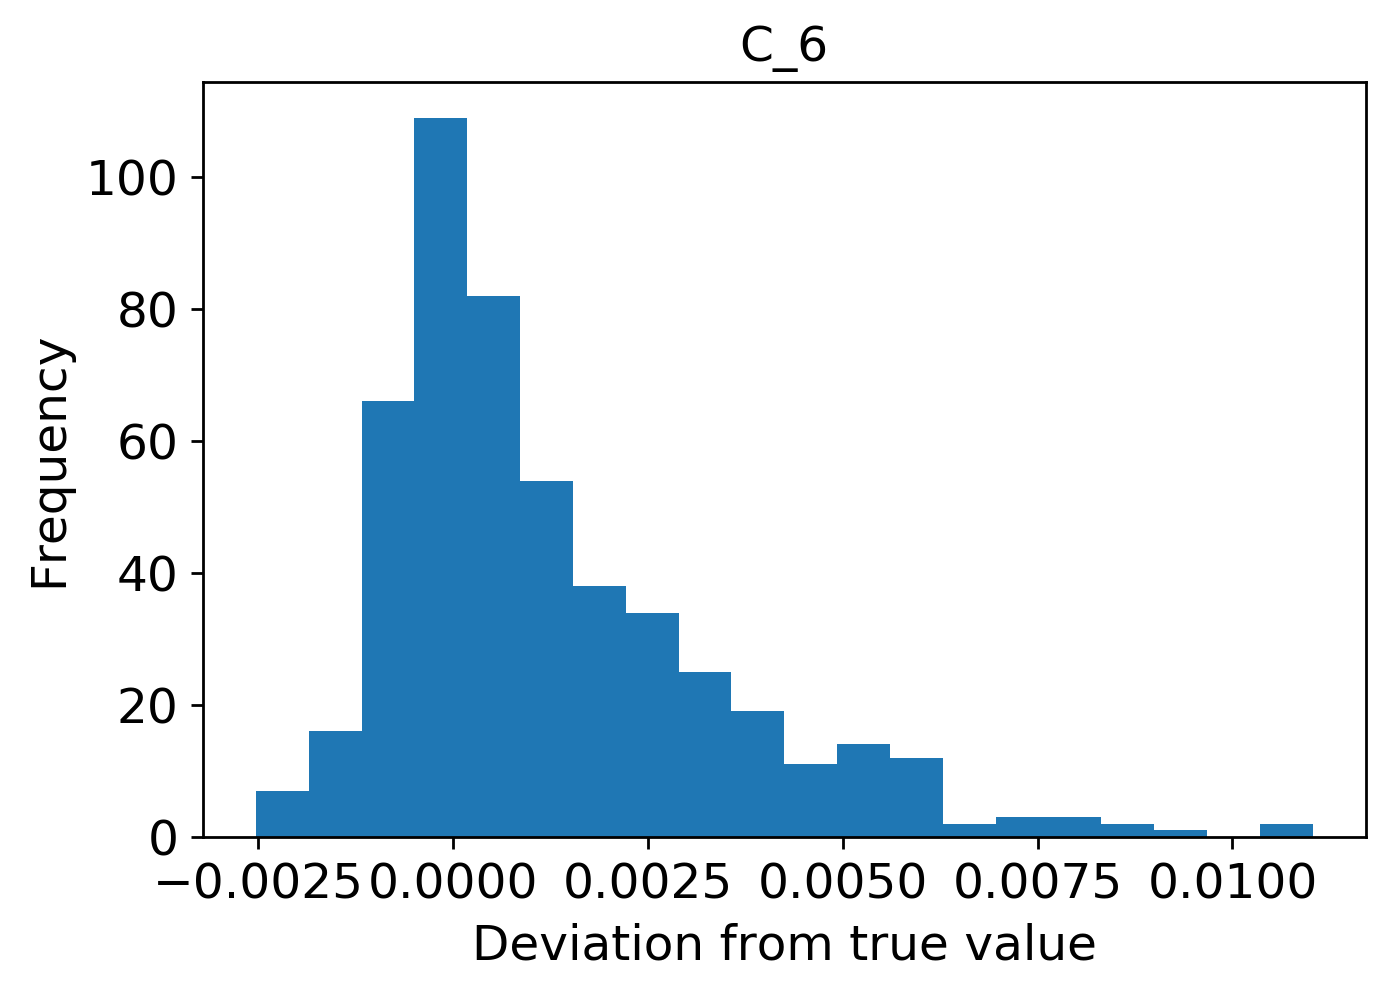

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from scipy import stats
from scipy.interpolate import interp1d 
import pandas as pd
from pykrige import OrdinaryKriging as OK
import ipdb
from scipy import stats

import ipdb
#ipdb.set_trace()

datadir = '/home/rimali2009/Journal_2/data_g6_j2_roi770_jogan_5500_400grid/'
resdir = '/home/rimali2009/Journal_2/result_g6_j2_roi770_jogan_5500_400grid/5000/'
#Initial setting
if not "model" in locals(): 
    model = load_model(resdir+'model3.hdf5')

# Load test datasets

X_test = np.loadtxt(datadir + 'x_test.txt',delimiter=',')
y_test = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')


# Normalize the test datasets
min_x, max_x = np.loadtxt(datadir + 'x_minmax.txt',delimiter=',')
X_test_norm =  (X_test - min_x) / (max_x - min_x)


gclass = 6
gclass_name= ['507','439','380','329','285','246'] 
gclass_label = ["507${\mu}m$","439 ${\mu}m$", "380 ${\mu}m$","329${\mu}m$", "285${\mu}m$","246${\mu}m$"]

topodx = 10.0
coord_num = int(model.layers[0].input_shape[1]/gclass)

#Acquires a value for normalizing input data to [0, 1]
y_min = np.loadtxt(datadir + 'icond_min.txt',delimiter=',')
y_max = np.loadtxt(datadir + 'icond_max.txt',delimiter=',')

# Load outcrop data
outcrop = pd.read_csv('../Journal_2/jogan_gs6_range.csv')
outcrop = outcrop.sort_values('distance')
outcrop['distance'] = outcrop['distance'] - 0
outcrop_num = len(outcrop['distance'])
print(outcrop)

#Preparation under interpolation
thick_interp_at_outcrop = np.zeros([X_test.shape[0],outcrop_num*gclass])
thick_interp = np.zeros([X_test.shape[0],coord_num*gclass])#Interpolated sample thickness data
outcrop_x_id = np.round(outcrop['distance']/topodx).astype(np.int32) #Index number of sampling point in inverse analysis system
x = np.arange(0,coord_num*topodx,topodx)

# Interpolation of test datasets at the outcrop locations
for i in range(X_test.shape[0]):
    for j in range(gclass):
        f = interp1d(x,X_test_norm[i,j * coord_num : (j+1) * coord_num], kind="cubic",bounds_error=False,fill_value='extrapolate')
        thick_interp_at_outcrop[i,outcrop_num*j:outcrop_num*(j+1)] = f(outcrop['distance']) #Supplemented data

    # Interpolation of test datasets at the grids of the forward model
    for j in range(gclass):
        f = interp1d(outcrop['distance'],thick_interp_at_outcrop[i,j * outcrop_num : (j+1) * outcrop_num], kind="cubic",bounds_error=False,fill_value='extrapolate')
        thick_interp[i,coord_num*j:coord_num*(j+1)] = f(x) #Supplemented data
    


#Normalize data
thick_interp[thick_interp < 0] = 0
print(thick_interp)

#Perform inverse analysis
test_result_outcrop = model.predict(thick_interp)
test_result_outcrop = test_result_outcrop * (y_max - y_min) + y_min
print(test_result_outcrop)
np.savetxt('outcrop_location_interp.txt',test_result_outcrop, delimiter=',')
test_result=np.loadtxt('outcrop_location_interp.txt', delimiter=',')
test_result_normal = np.loadtxt(resdir + 'test_result.txt',delimiter=',')
resi=test_result-y_test
titlelabel = ['Max Inundation Length','Flow Velocity', 'Max. Flow Depth', 'C_1', 'C_2', 'C_3', 'C_4','C_5','C_6']
hfont = {'fontname':'Century Gothic'}
textcol = 'k'
xymin=[770,1.5,1.5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001]
xymax=[4500,10.0,12.0,0.02,0.02,0.02,0.02,0.02,0.02]
xstep=[500,1.5,1.5,0.005,0.005,0.005,0.005,0.005,0.005]
stepmin=[770,1.0,2.0,0.000,0.0000,0.0000,0.0000,0.0000,0.000]
stepmax=[4550,10.5,13.0,0.025,0.025,0.025,0.025,0.025,0.025]
for i in range(len(gclass_label)):
    plt.plot(x,thick_interp[0,coord_num * i:coord_num * (i+1)], label='estimated')
for j in range(gclass):
    plt.plot(x,X_test_norm[0,j * coord_num : (j+1) * coord_num],'o',label='test')
    #plt.plot(outcrop['distance'], thick_interp_at_outcrop[0,outcrop_num*j:outcrop_num*(j+1)],'o',label='test')
plt.plot()
plt.legend()


for i in range(len(titlelabel)):
    plt.figure(num=None,dpi=250, facecolor='w', edgecolor='k')
    plt.plot(y_test[:,i],test_result[:,i],"o", markersize=4.5)
    plt.plot(y_test[:,i],test_result_normal[:,i],"*",label='estimate',markersize=3.5)
    x=y_test[:,i]
    y=test_result_normal[:,i]
    y2= test_result_normal[:, i]
    max_value = np.max([x, y, y2])
    min_value = np.min([x, y, y2])
    y_lim = plt.ylim([min_value * 0.8, max_value * 1.1])
    x_lim = plt.xlim([min_value * 0.8, max_value * 1.1])
    plt.plot(x_lim, y_lim, 'k-', color = 'k')
    plt.title(titlelabel[i],color=textcol,size=14,**hfont)
    plt.xlabel('True values',color=textcol,size=14,**hfont)
    plt.ylabel('Estimated values',color=textcol,size=14,**hfont)
    plt.legend()
    plt.axes().set_aspect('equal')
    plt.xticks(np.arange(stepmin[i],stepmax[i], step=xstep[i]))
    plt.yticks(np.arange(stepmin[i],stepmax[i], step=xstep[i]))
    #plt.plot(x_lim, y_lim, color = 'k')
    plt.tick_params(labelsize=14,colors='k')
    plt.savefig(resdir+titlelabel[i] + 'outcrop_locationrev' + '.pdf')
    plt.show()

for i in range(len(titlelabel)):
    plt.figure(num=None,dpi=250, facecolor='w', edgecolor='k')
    plt.hist(resi[:,i],bins=20)
    print('Standard Deviation sample:', np.std(resi[:,i],ddof=1))
    print('Mean:', np.mean(resi[:,i]))
    print('mode',stats.mode(resi[:,i]))
    print('m',np.median(resi[:,i]))
    plt.title(titlelabel[i],color=textcol,size=14,**hfont)
    plt.xlabel('Deviation from true value',color=textcol,size=14,**hfont)
    plt.ylabel('Frequency',color=textcol,size=14,**hfont)
    plt.tick_params(labelsize=14,colors=textcol)
    plt.savefig(resdir+titlelabel[i] + 'hist_outcrop_locationrev' + '.eps')
    plt.savefig(resdir+titlelabel[i] + 'hist_outcrop_locationrev' + '.pdf')
    plt.show()